In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from typing import Dict, Tuple

In [14]:
df = pd.read_csv('../../Datasets/Final Datasets/model_dataset.csv')
df.head()

,O*NET-SOC Code,Title,Attribute Type,Element ID,Element Name,Scale Name,Data Value
0,11-1011.00,Chief Executives,Knowledge,2.C.1.a,Administration and Management,Importance,4.78
1,11-1011.00,Chief Executives,Knowledge,2.C.1.a,Administration and Management,Level,6.50
2,11-1011.00,Chief Executives,Knowledge,2.C.1.b,Administrative,Importance,2.42
3,11-1011.00,Chief Executives,Knowledge,2.C.1.b,Administrative,Level,2.69
4,11-1011.00,Chief Executives,Knowledge,2.C.1.c,Economics and Accounting,Importance,4.04


In [15]:
df.info()

df.describe()

df.isnull().sum()

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391425 entries, 0 to 391424
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   O*NET-SOC Code  391425 non-null  object 
 1   Title           391425 non-null  object 
 2   Attribute Type  391425 non-null  object 
 3   Element ID      391425 non-null  object 
 4   Element Name    391425 non-null  object 
 5   Scale Name      391425 non-null  object 
 6   Data Value      391425 non-null  float64
dtypes: float64(1), object(6)
memory usage: 20.9+ MB


Index(['O*NET-SOC Code', 'Title', 'Attribute Type', 'Element ID',
       'Element Name', 'Scale Name', 'Data Value'],
      dtype='object')

In [16]:
df['Attribute Type'].unique()

array(['Knowledge', 'Skill', 'Ability', 'Education', 'Experience',
       'Training', 'Interest', 'Work Values', 'Work Styles',
       'Work Activity', 'Work Context'], dtype=object)

In [17]:
df

,O*NET-SOC Code,Title,Attribute Type,Element ID,Element Name,Scale Name,Data Value
0,11-1011.00,Chief Executives,Knowledge,2.C.1.a,Administration and Management,Importance,4.78
1,11-1011.00,Chief Executives,Knowledge,2.C.1.a,Administration and Management,Level,6.50
2,11-1011.00,Chief Executives,Knowledge,2.C.1.b,Administrative,Importance,2.42
3,11-1011.00,Chief Executives,Knowledge,2.C.1.b,Administrative,Level,2.69
4,11-1011.00,Chief Executives,Knowledge,2.C.1.c,Economics and Accounting,Importance,4.04
...,...,...,...,...,...,...,...
391420,53-7121.00,"Tank Car, Truck, and Ship Loaders",Work Context,4.C.3.b.7,Importance of Repeating Same Tasks,Context,4.45
391421,53-7121.00,"Tank Car, Truck, and Ship Loaders",Work Context,4.C.3.b.8,Structured versus Unstructured Work,Context,3.89
391422,53-7121.00,"Tank Car, Truck, and Ship Loaders",Work Context,4.C.3.c.1,Level of Competition,Context,2.97
391423,53-7121.00,"Tank Car, Truck, and Ship Loaders",Work Context,4.C.3.d.1,Time Pressure,Context,4.47


## Input Issue

The issue is that we have over 390,000 samples. Meaning if we want user to give inputs to get recommendations, they need to give inputs for over 390,000 features. This is not feasible and user-friendly. Some technical solutions to this problem are:

1. Use dimensionality reduction techniques like PCA to reduce the number of features.
2. Use clustering techniques to group similar samples together.

But the thing is for dimensionality reduction (PCA) approach is that we create new features based on the relevancy of variance. But we only have 7 features and we need to use all of them. Issue is the number of inputs needed under each 'Attribute Type'. For example, for our first attribute type 'Knowledge' alone, there are multiple elements required to be inputted like 'Administration and Management', 'Administrative', 'Economics and Accounting', etc. These are all rows in our dataset rather than columns(features).

So we need to find a way to reduce the number of inputs needed from the user while still maintaining the relevance of the features. So a more user-friendly approach would be to use clustering techniques.

## Wide + PCA

Ok so I might have cooked another approach. Our current dataset is in a long format. What if we convert it into a wide format, where each column is the different attribute types and their elements. And then we can use PCA to reduce the number of features to get the most relevant features for a recommendation.

## Hierarchical Clustering Approach:

**Advantages:**
- Maintains intpretability of attributes.
- Can cluster similar elements together within each attribute type.
- More intuitive for users to understand.

**Disadvantages:**
- Doesn't reduce input complexity as effectively.
- Still requires user to input a lot of features.
- May lose granularity in recommendations.

## Wide Format + PCA Approach:

**Advantages:**
- Could significantly reduce input dimensionality.
- Might capture hidden patterns between attributes.
- Would require fewer inputs from the user.

**Disadvantages:**
- Loss of interpretability
- Difficult to explain recommendations
- Complex transformation needed
- Hard to maintain separate scales for importance and level for each attribute type

## Hybrid Approach:

1. Transform Data Structure

```python
df_wide = pd.pivot(df, 
    index='Title',
    columns=['Attribute Type', 'Element Name', 'Scale Name'],
    values='Data Value')
```
2. Apply hierarchical clustering within attribute types
    - Cluster similar elements with Knowledge, Skills, etc.
    - Create super-categories for user input
    - Maintain interpretability while reducing input complexity
3. Progressive Input System
    - Start with cluster-level inputs
    - Allow drilling down for high-interest areas
    - Use default value for low-interest areas

I think this hybrid approach is the best way to go. It maintains interpretability while reducing the number of inputs needed from the user.

## Hierarchical Clustering Update

Completely avoiding PCA for now. Reason being that we already only have 7 features and we need to use all of them. Therefore, we don't need to reduce the number of features. Instead we will try just hierarchical clustering with various linkage methods and see which one gives the best results such as ward, euclidean, complete, single, average, etc.

**Note**: We are NOT clustering the different job titles. We are clustering the different attributes and their elements!

### Why Hierarchical Clustering?

Well our dataset already has hierarchical relationships between the attributes. For example, Knowledge -> Administration and Management, Administrative, Economics and Accounting, etc. So we can use that to our advantage.

Different linkage methods are:
- Ward: Minimizes the variance of the clusters being merged. Tries to keep the clusters as compact as possible. Usually gives more balanced clusters. Good for wanting clusters to be compact.
- Complete/Maximum: Looks at the farthest points between clusters. Very sensitive to outliers. Creats tight and compact clusters. Good for finding compact, similar-sized clusters when data is clean.
- Single/Minimum: Looks at the closest points between clusters. Also very sensitive to outliers. Can handle non-elliptical shapes. Often creates long, stretched-out clusters. Good for finding irregularly shaped clusters.
- Average: Takes the average distance between all points in clusters. More balanced than a single or complete. Less sensitive to outliers. Good for general purpose clustering when you're not sure which linkage method to use.

### Which attributes to cluster?

We will be only clustering the following attributes:
- Knowledge
- Skills
- Abilities
- Work Context
- Work Activities

## Hierarchical Clustering Filtering

For hierarchial clustering I'll be using different linkage methods for each attribute type, we need to find the optimal number of clusters for each attribute type. Usually, this is done by applying the elbow method to the dendrogram or using the silhouette score. But what I think I need to do is to cut the dendrogram at a certain height and then see how many clusters we get. We can do this by trial and error manually. 

### Automated + Manual

Automated metrics alone won't guarantee the best results. And in my case, manual trial and error may be the best way to go. We will apply automated metrics to filter out the dendrograms that are not good and then we will manually inspect the remaining dendrograms and see which one gives the best results.

### Cutting the dendrogram at a certain height

We will manually inspect the dendrogram at different heights and each height will correspond to a different number of clusters. It is important to look for large vertical gaps ("gaps" in the y-axis of the dendrogram) to determine the optimal number of clusters. Big gaps may indicate the optimal number of clusters. Big gaps means more distinct clusters and distinct clusters which are more meaningful and useful.

### Using Domain Knowledge

I need to go through the cluster groups to check if they align with the natural groups (e.g., if 
"Administration and Management" and "Economics and Accounting" end up in the same cluser, is this logical?)

### Quantitive Cluster Validity Indices (Unsupervised)

Even without labels, we can use cluster validity metrics. It helps us see how 'cohesive' or 'separated' the clusters are. Some methods are:
- Silhouette Score: Measures how similar a sample is to its own cluster (cohesion) compared to other clusters (separation). High silhouette values (close to 1) mean well-defined clusters.
- Davies-Bouldin Index: Measures average 'similarity' between clusters based on the ratio of within-cluster distance to between-cluster distance. Lower is better.
- Calinski-Harabasz Index: Ratio of the between-clusters variance to the within-cluster variance. Higher is better.

### Compare Linkage Methods + Metrics

Since I've tried different linkage methods, for each method, I need to apply the cluster validity metrics and see which method gives the best results. There's a possibility that for some attributes, one method may give better results than others. 'Single' may be better for some attributes and 'Ward' may be better for others, etc.

In [22]:
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

plt.style.use('default')
attributes_to_cluster = ['Knowledge', 'Skill', 'Ability', 'Work Context', 'Work Activity']

# We'll store evaluations like:
# cluster_evaluation[attribute][method] = {
#     'silhouette': {'best_k': ..., 'best_score': ...},
#     'davies_bouldin': {'best_k': ..., 'best_score': ...},
#     'calinski_harabasz': {'best_k': ..., 'best_score': ...},
#     'details': {k_value: (sil, db, ch), ...}  # all scores for each k
# }
cluster_evaluation = {}
wide_dfs = {}

# 1. Filter attributes
df_attr = df[df['Attribute Type'].isin(attributes_to_cluster)]

# 2. Create separate dataframes for each attribute
attr_dfs = {
    attr: df_attr[df_attr['Attribute Type'] == attr]
    for attr in attributes_to_cluster
}

# 3. Process each attribute
for attr, attr_df in attr_dfs.items():
    # Create a dictionary to store results for each linkage method
    cluster_evaluation[attr] = {}
    
    try:
        # 3a. Create wide format
        wide_df = pd.pivot(
            attr_df,
            index='Title',
            columns=['Element Name', 'Scale Name'],
            values='Data Value'
        )
        wide_dfs[attr] = wide_df
            
        # 3b. Handle missing values
        imputer = SimpleImputer(strategy='mean')
        df_filled = pd.DataFrame(
            imputer.fit_transform(wide_df),
            columns=wide_df.columns,
            index=wide_df.index
        )
        
        # 3c. Standardize
        scaler = StandardScaler()
        df_scaled = pd.DataFrame(
            scaler.fit_transform(df_filled),
            columns=df_filled.columns,
            index=df_filled.index
        )
        
        # IMPORTANT: We want to cluster columns => transpose
        data_for_clustering = df_scaled.T  # shape: (#elements, #job_titles)
        
        # 3d. Try multiple linkage methods
        linkage_methods = ['ward', 'complete', 'single', 'average']
        for method in linkage_methods:
            linkage_matrix = linkage(data_for_clustering, method=method)
            
            # We track the best k for each metric separately
            best_k_sil, best_score_sil = None, -1
            best_k_db, best_score_db = None, float('inf')
            best_k_ch, best_score_ch = None, -1
            
            # We'll also keep a record of scores for each k for reference
            k_scores = {}
            
            # We'll try k from 2 up to at most 15 or the number of elements
            max_k = min(15, data_for_clustering.shape[0])
            for k in range(2, max_k + 1):
                labels = fcluster(linkage_matrix, t=k, criterion='maxclust')
                
                # If there's only 1 sample in a cluster, some metrics can fail
                try:
                    sil = silhouette_score(data_for_clustering, labels, metric='euclidean')
                except ValueError:
                    sil = -1  # Or np.nan, so we know it failed
                
                db = davies_bouldin_score(data_for_clustering, labels)
                ch = calinski_harabasz_score(data_for_clustering, labels)
                
                # Update best silhouette
                if sil > best_score_sil:
                    best_score_sil = sil
                    best_k_sil = k
                
                # Update best davies-bouldin (lower is better)
                if db < best_score_db:
                    best_score_db = db
                    best_k_db = k
                
                # Update best calinski-harabasz (higher is better)
                if ch > best_score_ch:
                    best_score_ch = ch
                    best_k_ch = k
                
                # Store full detail for this k
                k_scores[k] = (sil, db, ch)
            
            # Store final best results for this method
            cluster_evaluation[attr][method] = {
                'linkage_matrix': linkage_matrix,
                'silhouette': {'best_k': best_k_sil, 'best_score': best_score_sil},
                'davies_bouldin': {'best_k': best_k_db, 'best_score': best_score_db},
                'calinski_harabasz': {'best_k': best_k_ch, 'best_score': best_score_ch},
                'details': k_scores
            }
        
    except Exception as e:
        print(f"Error processing {attr}: {e}")
        continue

# 4. Summarize & pick winners
print("\nClustering Complete. Summarizing results by metric:")

for attr in cluster_evaluation:
    print(f"\nAttribute: {attr}")
    for method, info in cluster_evaluation[attr].items():
        sil_info = info['silhouette']
        db_info = info['davies_bouldin']
        ch_info = info['calinski_harabasz']
        
        print(f"  Method: {method}")
        print(f"    • Best Silhouette: k={sil_info['best_k']}, score={sil_info['best_score']:.3f} (higher=better)")
        print(f"    • Best DB Index:  k={db_info['best_k']}, score={db_info['best_score']:.3f} (lower=better)")
        print(f"    • Best CH Score:  k={ch_info['best_k']}, score={ch_info['best_score']:.3f} (higher=better)")


Clustering Complete. Summarizing results by metric:

Attribute: Knowledge
  Method: ward
    • Best Silhouette: k=15, score=0.339 (higher=better)
    • Best DB Index:  k=15, score=1.085 (lower=better)
    • Best CH Score:  k=2, score=16.406 (higher=better)
  Method: complete
    • Best Silhouette: k=15, score=0.332 (higher=better)
    • Best DB Index:  k=15, score=1.074 (lower=better)
    • Best CH Score:  k=2, score=17.738 (higher=better)
  Method: single
    • Best Silhouette: k=15, score=0.205 (higher=better)
    • Best DB Index:  k=2, score=0.972 (lower=better)
    • Best CH Score:  k=15, score=3.330 (higher=better)
  Method: average
    • Best Silhouette: k=15, score=0.354 (higher=better)
    • Best DB Index:  k=15, score=0.970 (lower=better)
    • Best CH Score:  k=2, score=15.594 (higher=better)

Attribute: Skill
  Method: ward
    • Best Silhouette: k=2, score=0.462 (higher=better)
    • Best DB Index:  k=2, score=0.791 (lower=better)
    • Best CH Score:  k=2, score=60.046 (h

## Automated Cluster Metrics Results





Processing Knowledge:
Shape of Knowledge wide format: (873, 66)
Linkage Method:  ward


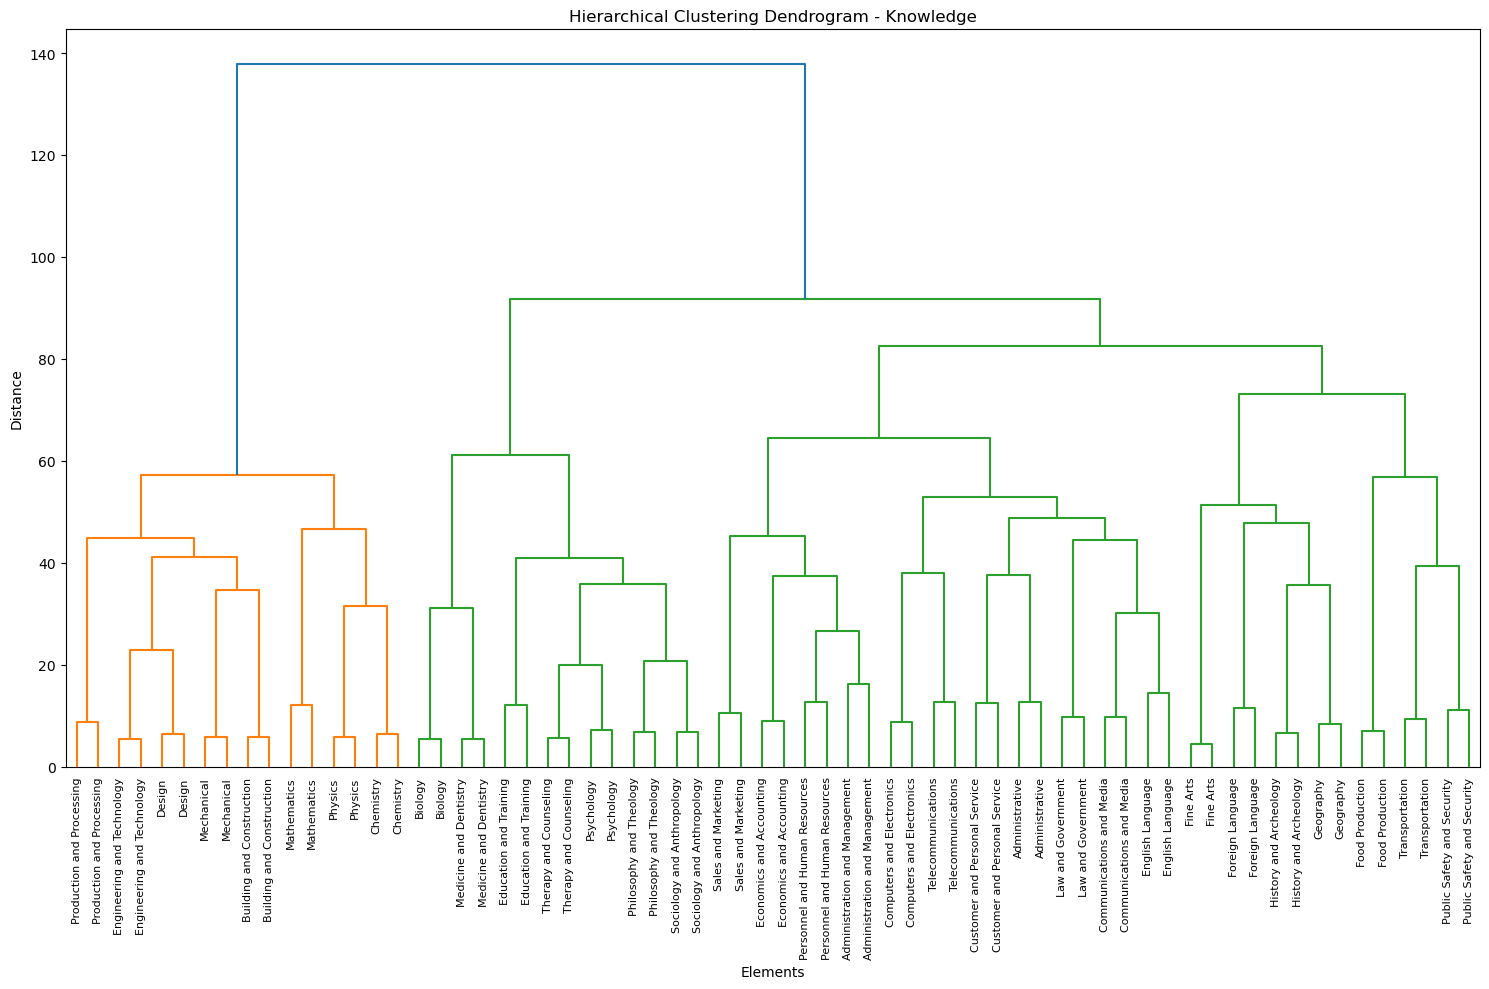

Number of elements clustered: 66
Height range of dendrogram: 4.46 to 137.76
Linkage Method:  complete


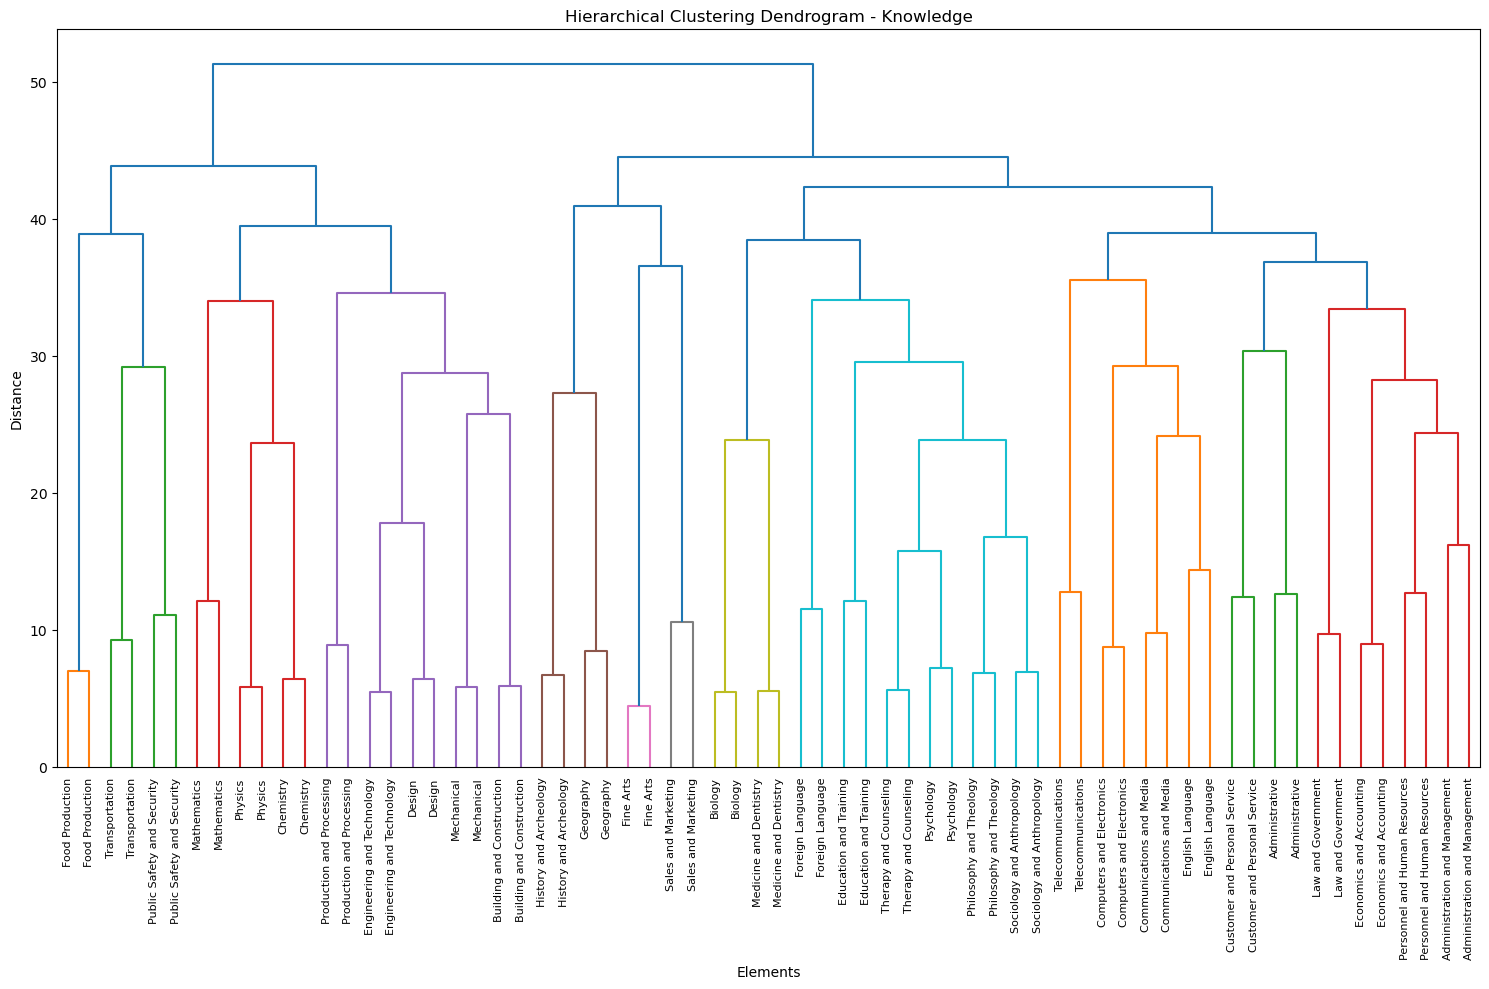

Number of elements clustered: 66
Height range of dendrogram: 4.46 to 51.25
Linkage Method:  single


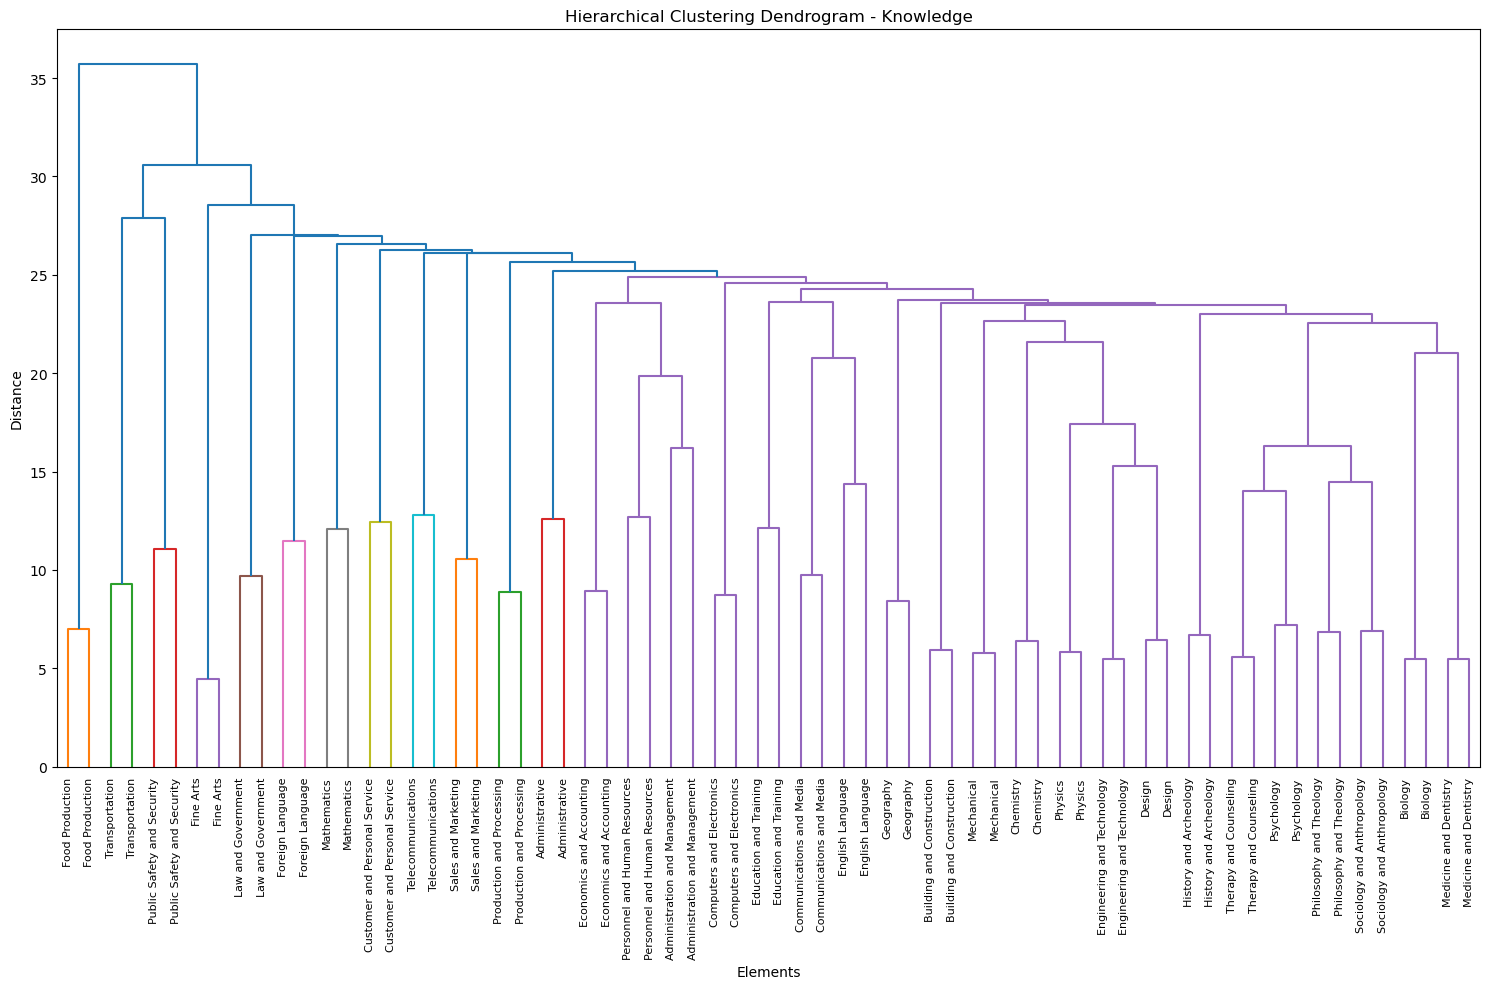

Number of elements clustered: 66
Height range of dendrogram: 4.46 to 35.69
Linkage Method:  average


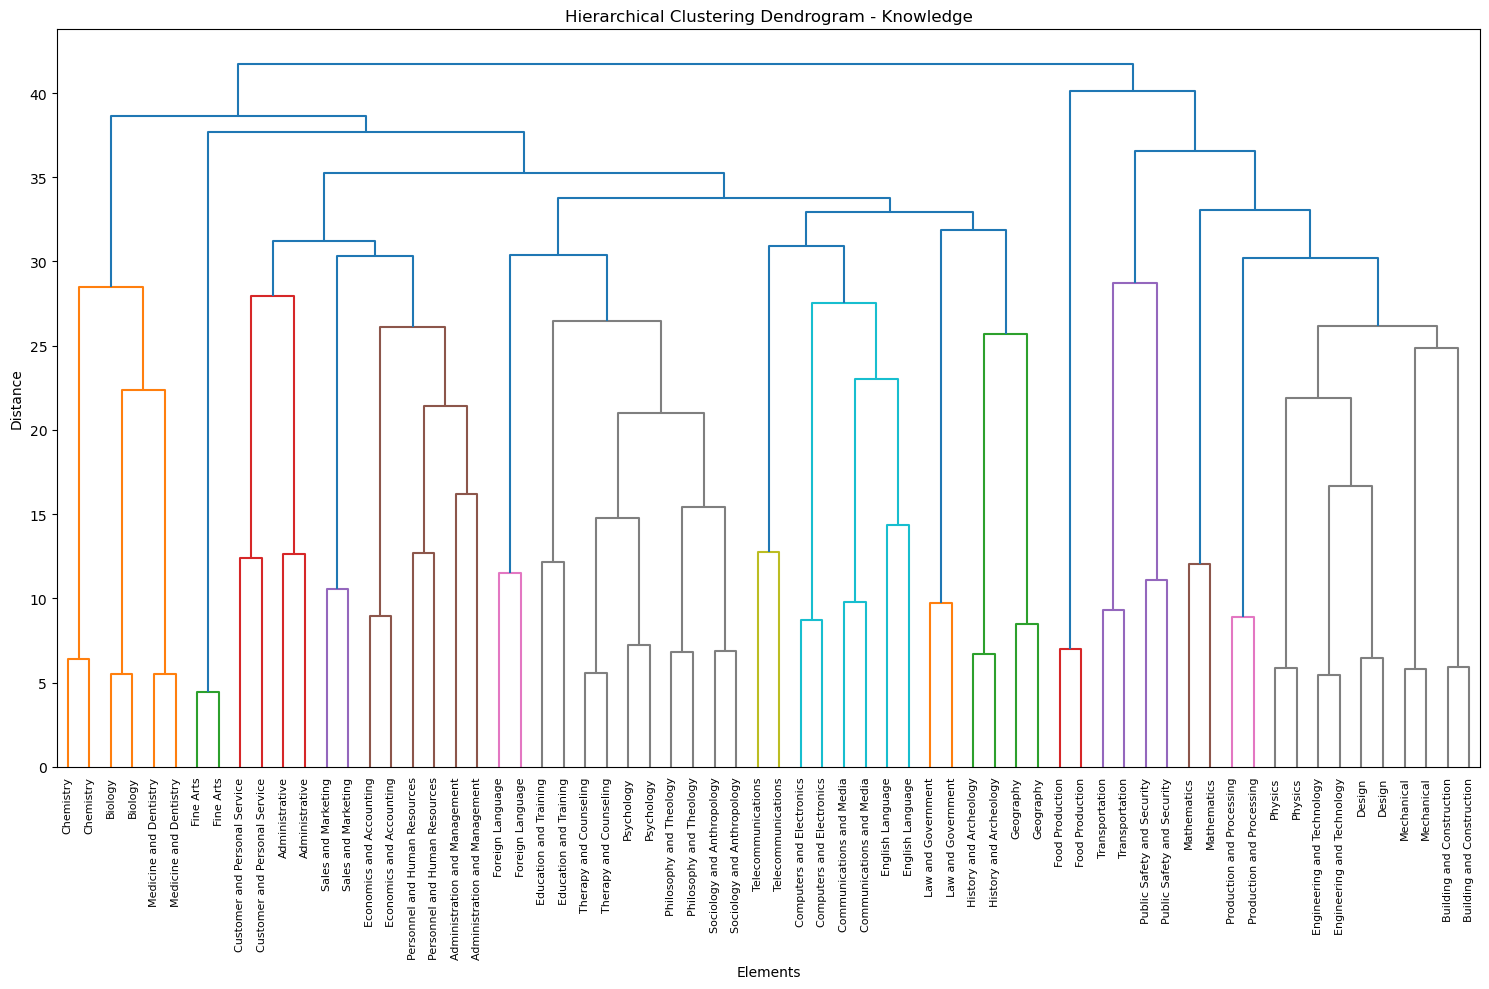

Number of elements clustered: 66
Height range of dendrogram: 4.46 to 41.70

Processing Skill:
Shape of Skill wide format: (873, 70)
Linkage Method:  ward


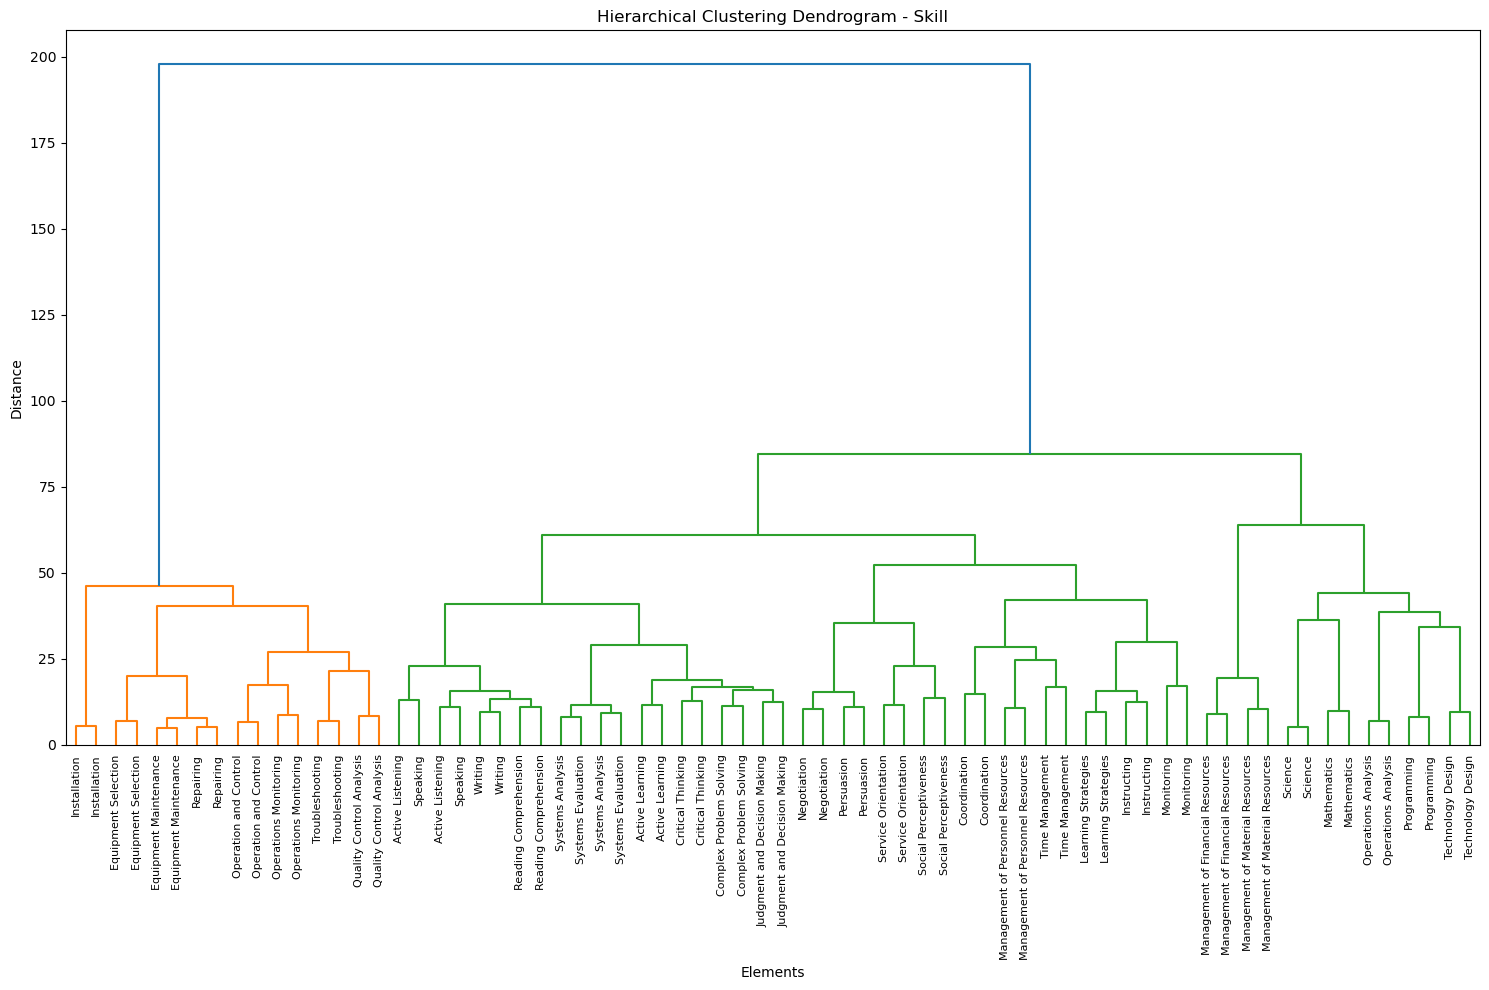

Number of elements clustered: 70
Height range of dendrogram: 4.80 to 197.82
Linkage Method:  complete


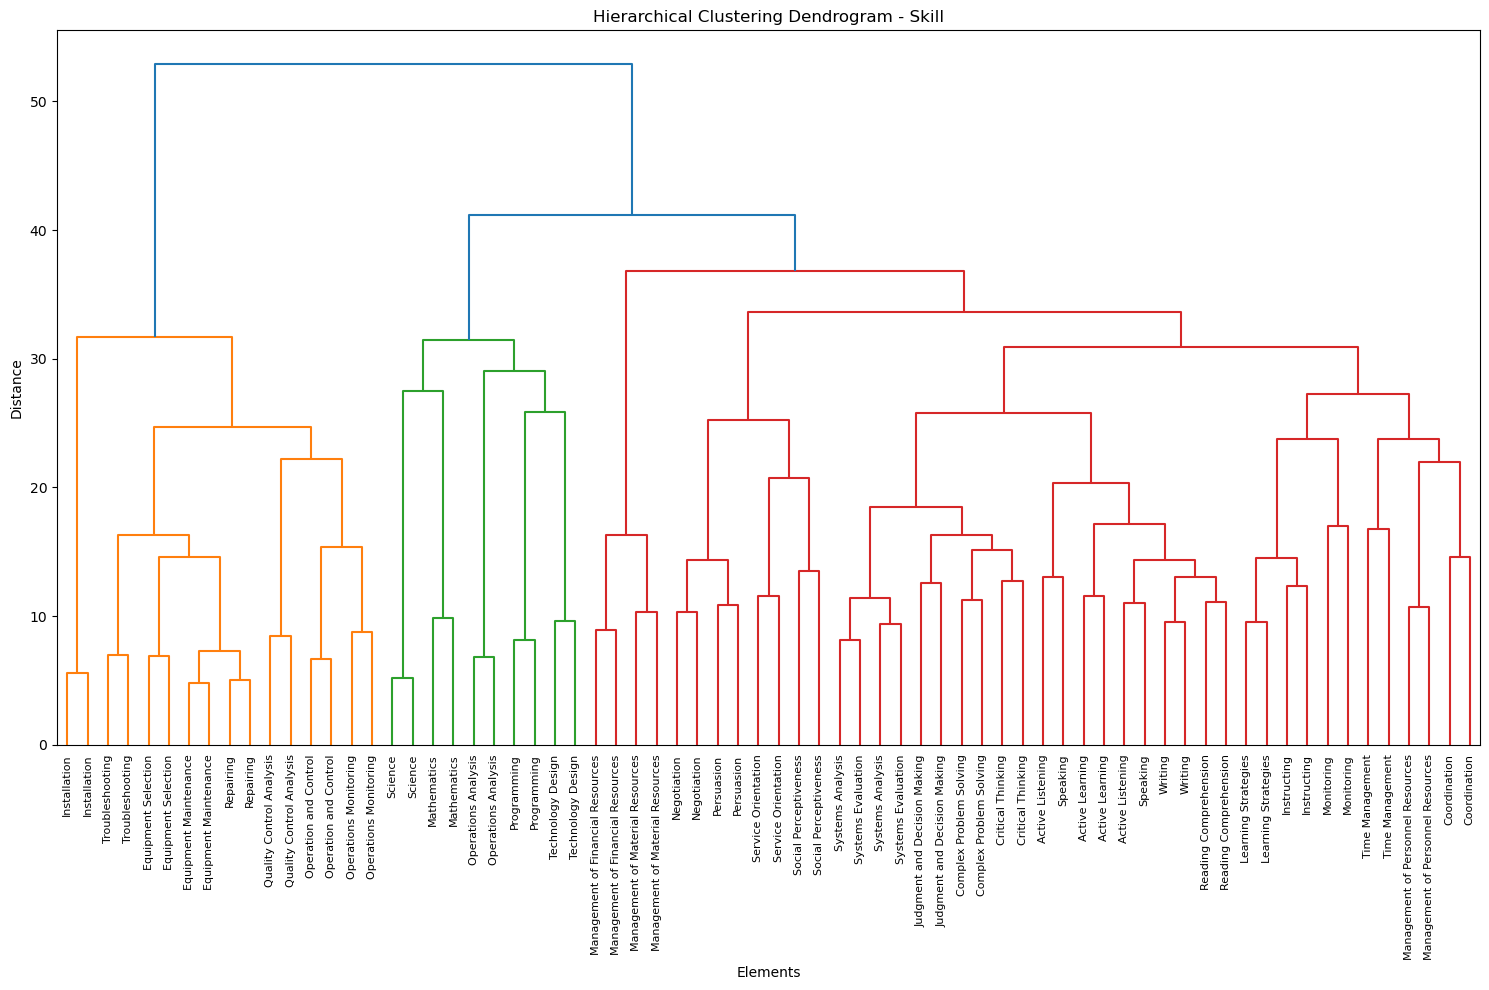

Number of elements clustered: 70
Height range of dendrogram: 4.80 to 52.88
Linkage Method:  single


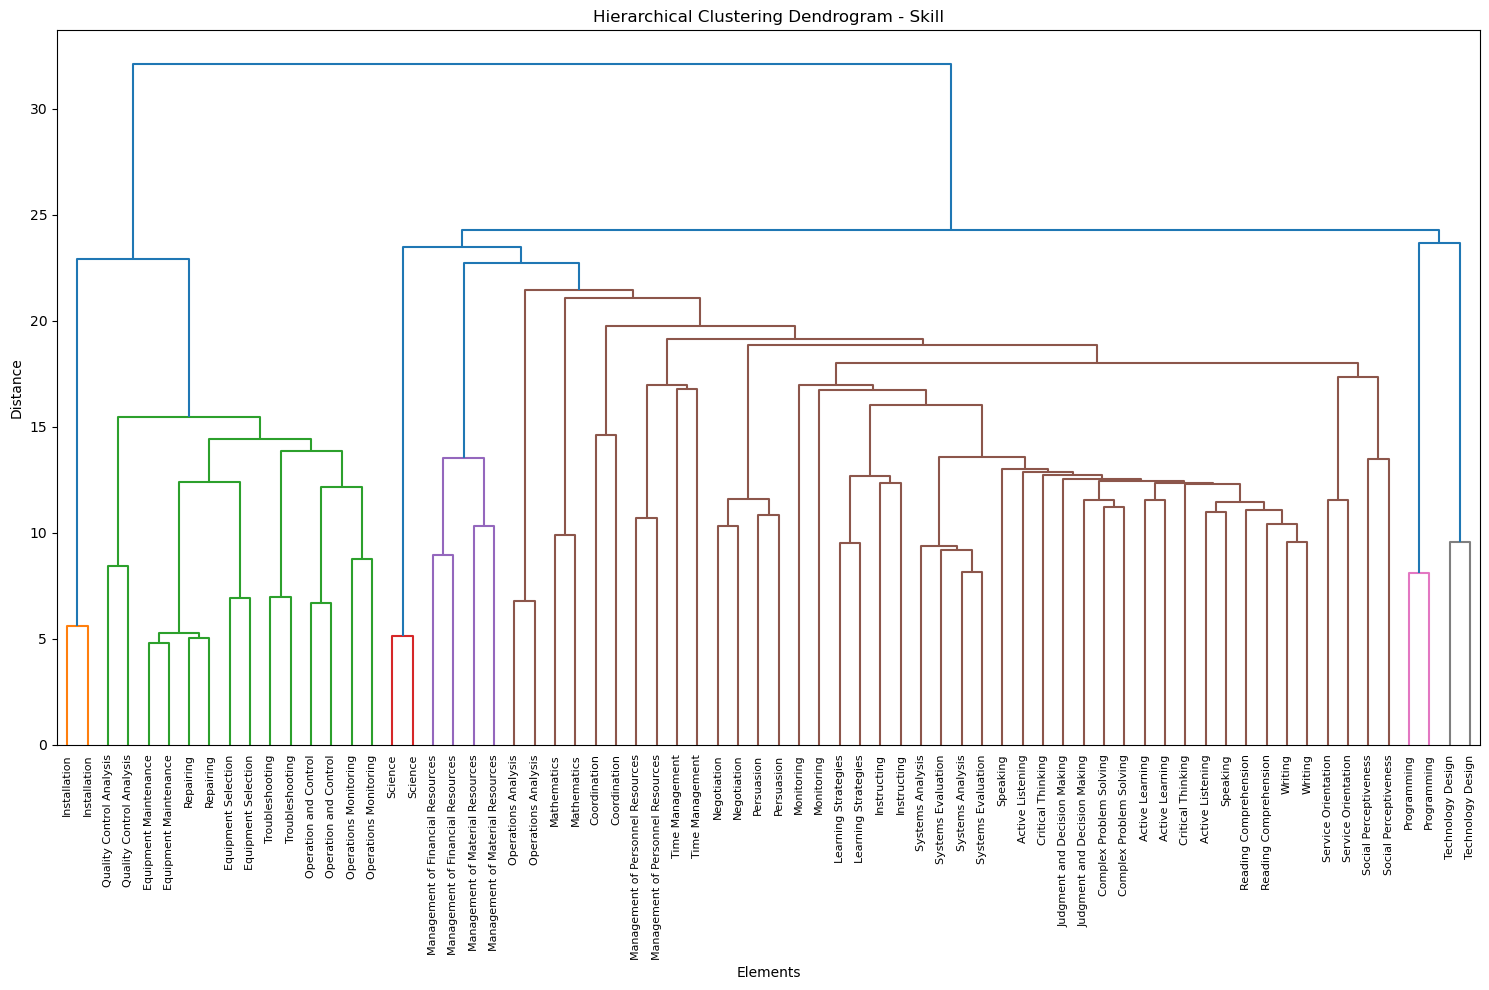

Number of elements clustered: 70
Height range of dendrogram: 4.80 to 32.10
Linkage Method:  average


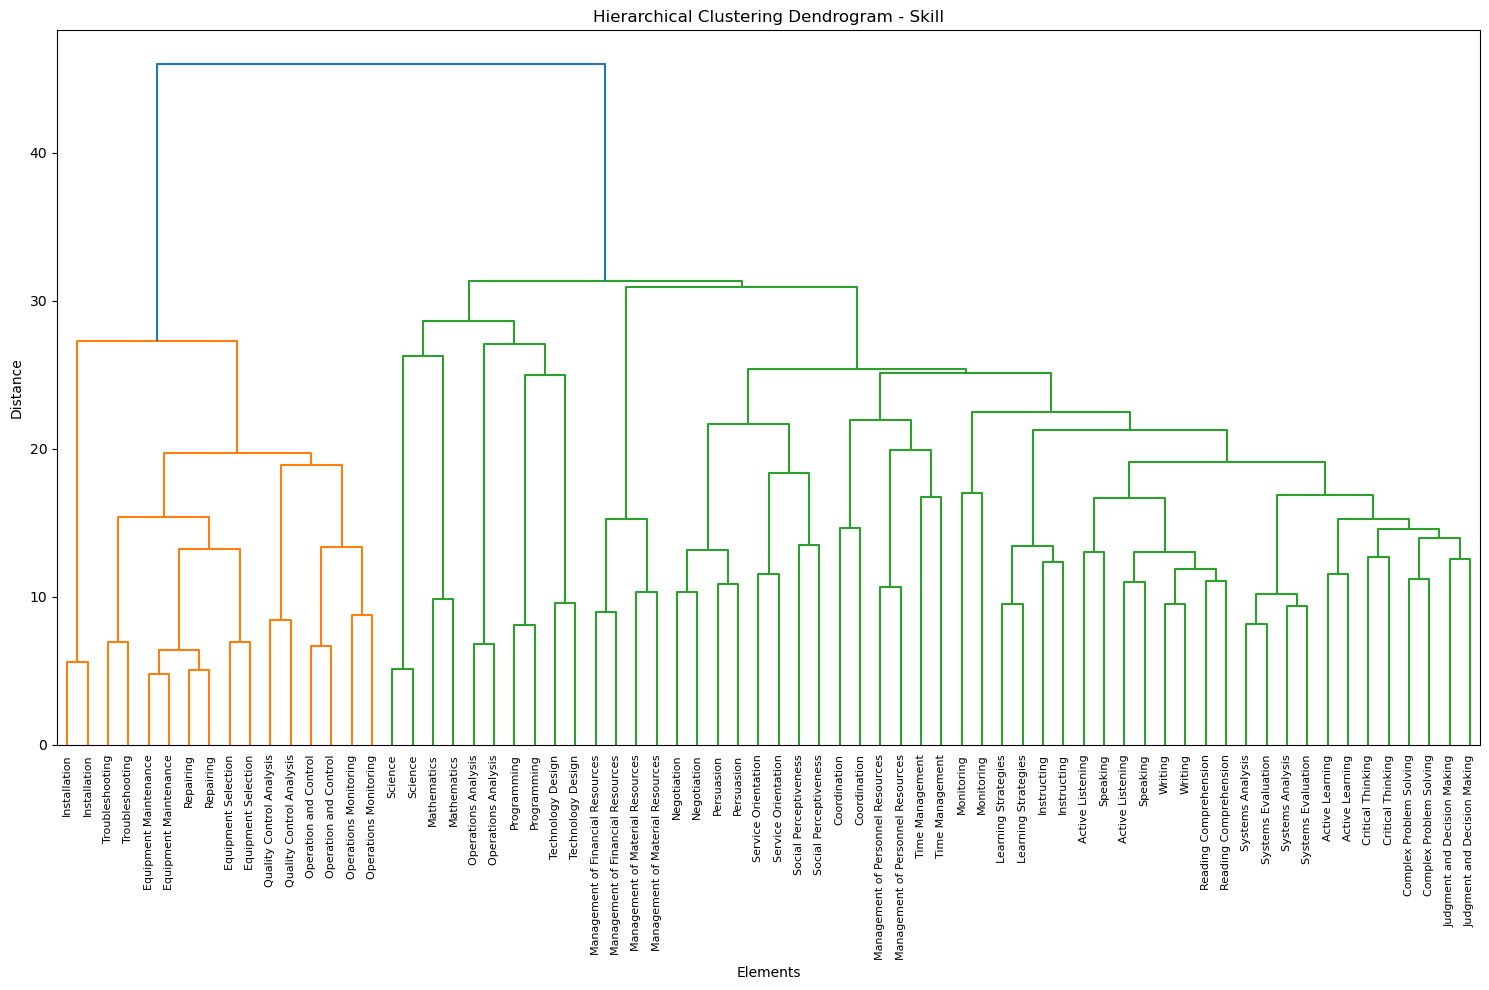

Number of elements clustered: 70
Height range of dendrogram: 4.80 to 45.98

Processing Ability:
Shape of Ability wide format: (873, 104)
Linkage Method:  ward


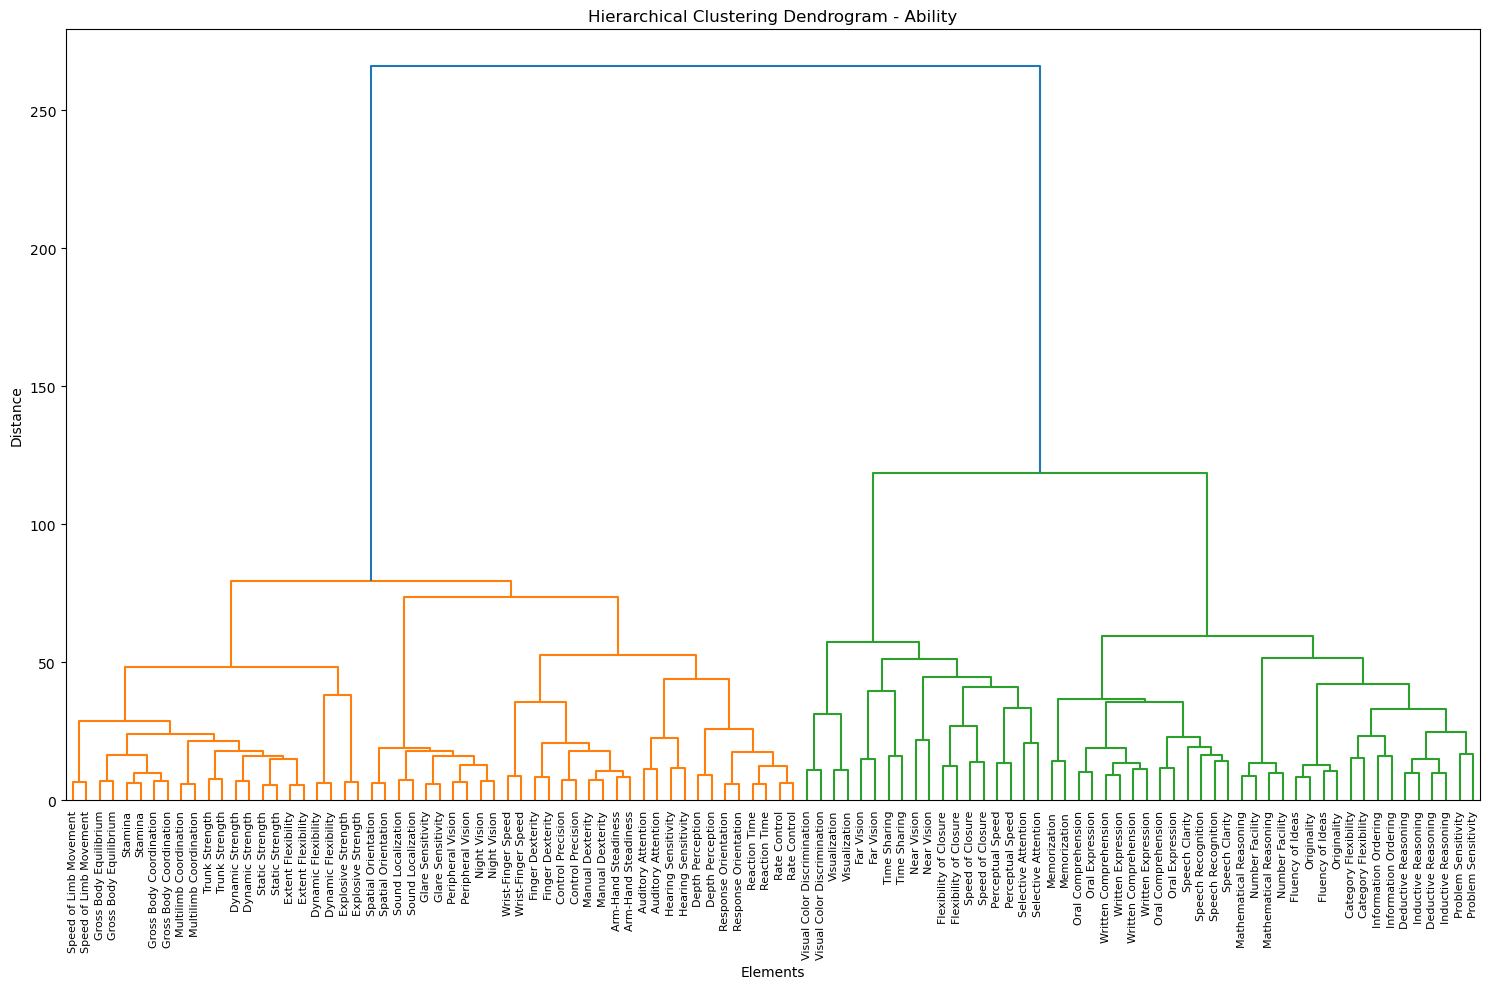

Number of elements clustered: 104
Height range of dendrogram: 5.42 to 265.94
Linkage Method:  complete


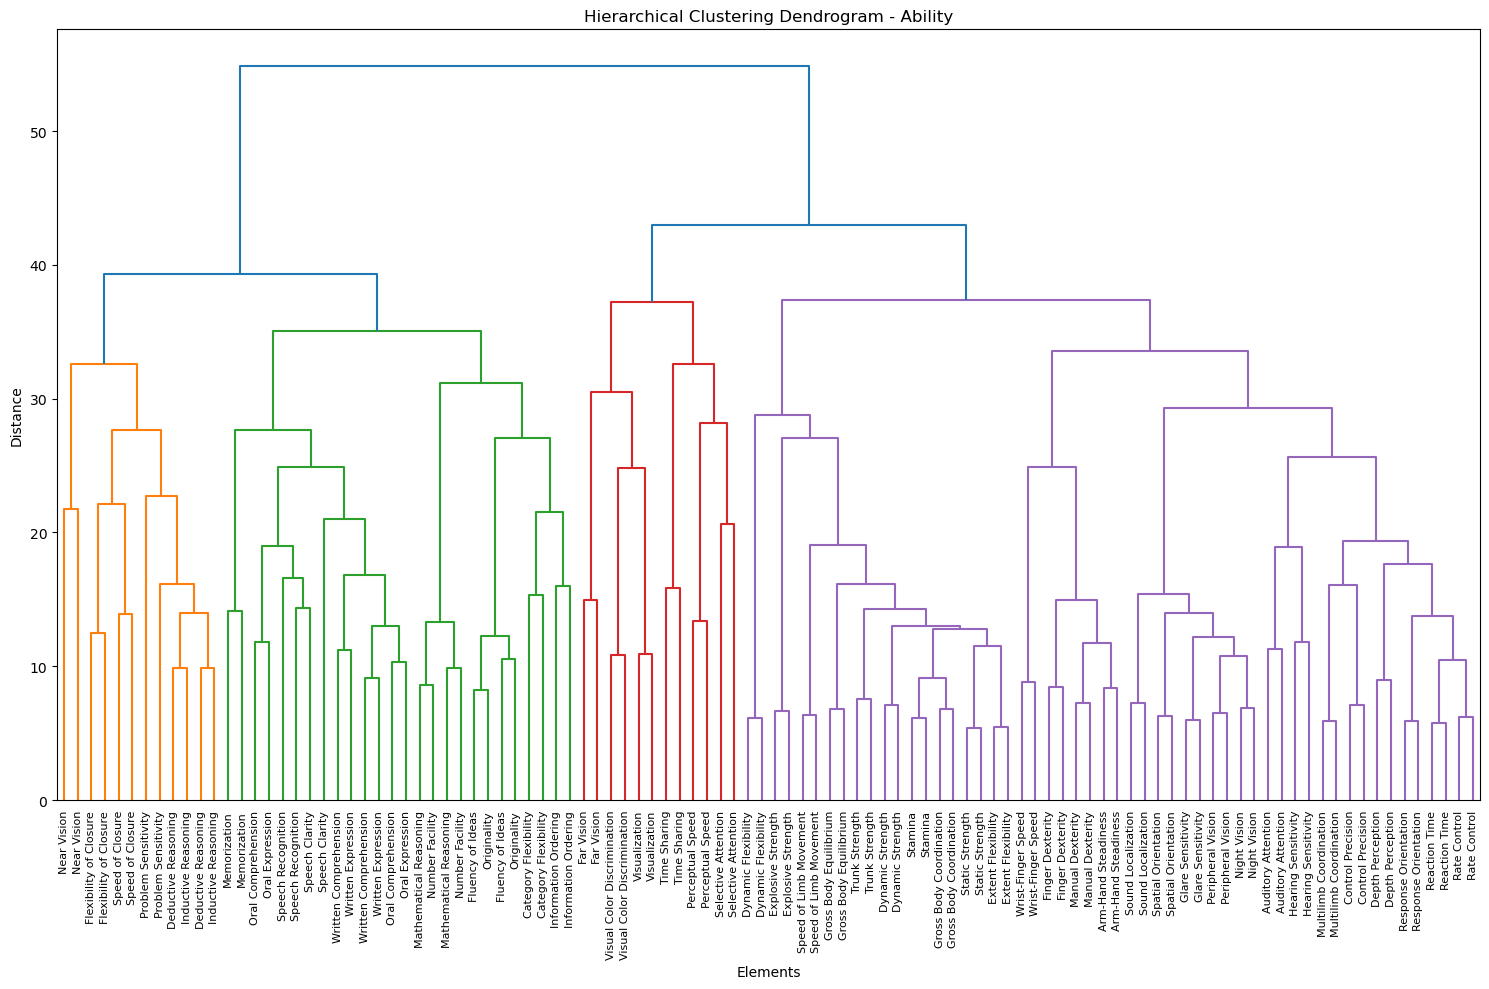

Number of elements clustered: 104
Height range of dendrogram: 5.42 to 54.86
Linkage Method:  single


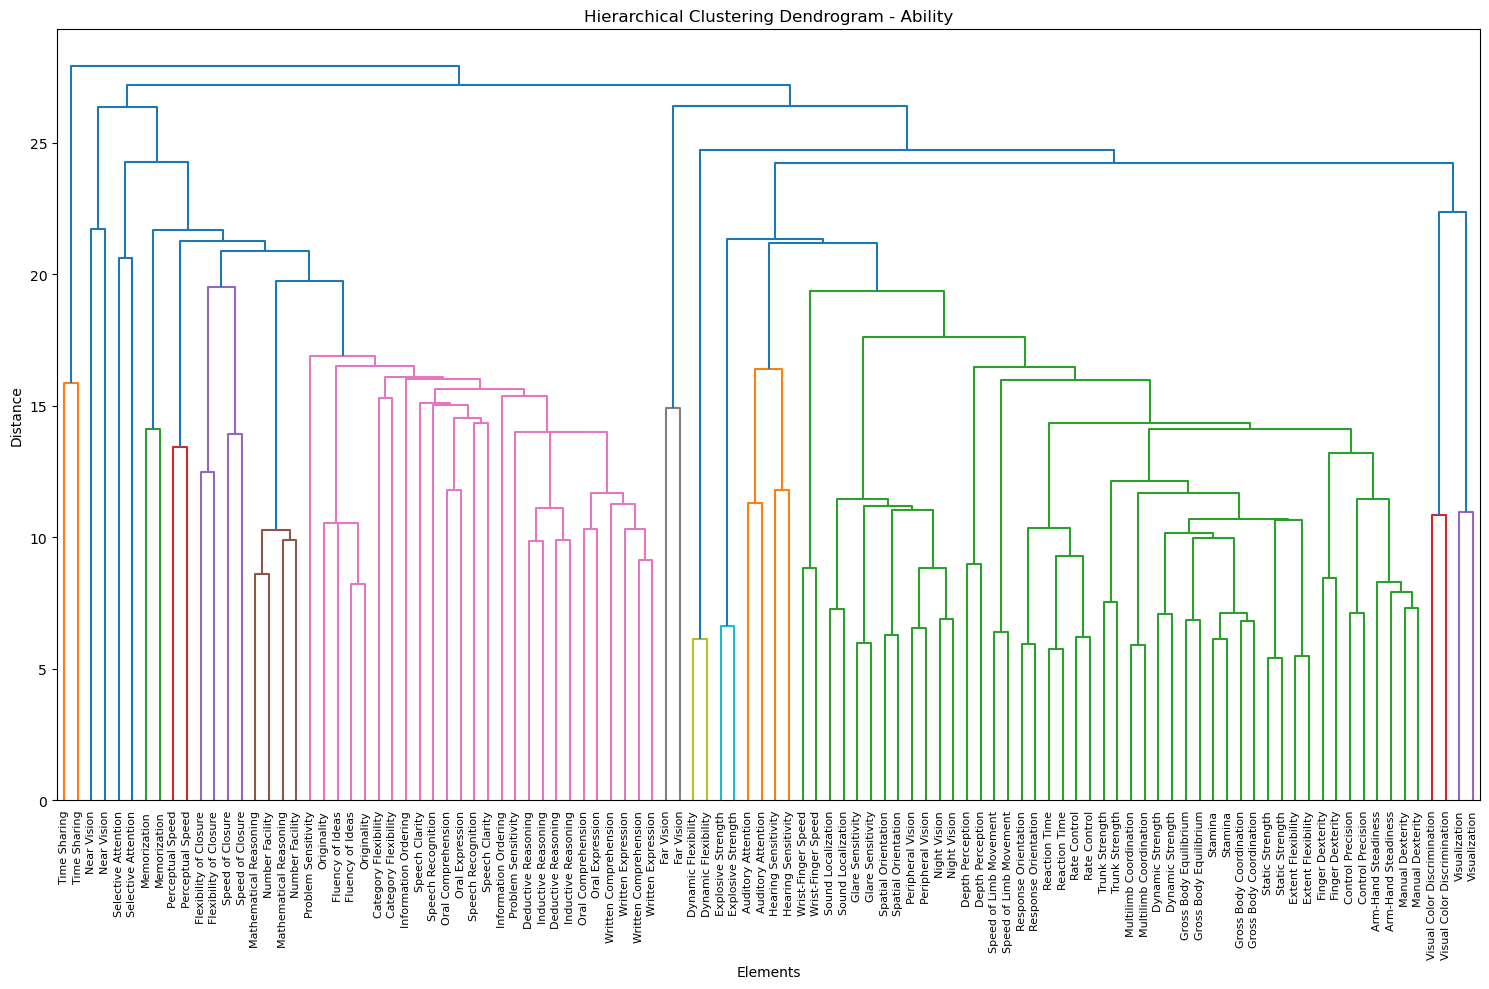

Number of elements clustered: 104
Height range of dendrogram: 5.42 to 27.92
Linkage Method:  average


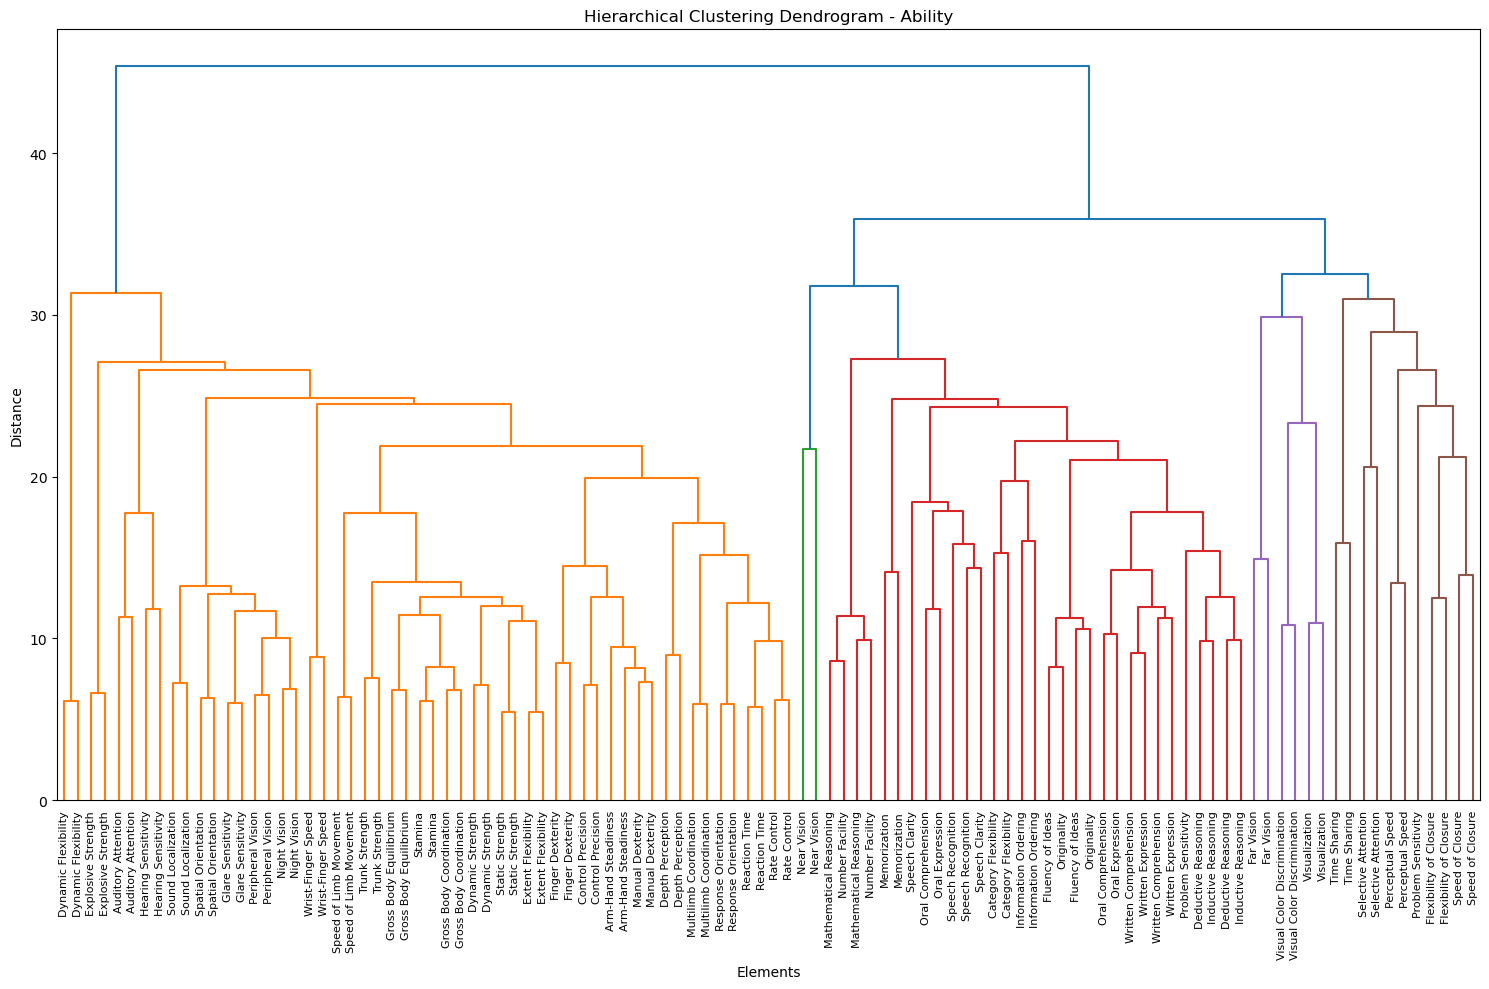

Number of elements clustered: 104
Height range of dendrogram: 5.42 to 45.39

Processing Work Context:
Shape of Work Context wide format: (873, 55)
Linkage Method:  ward


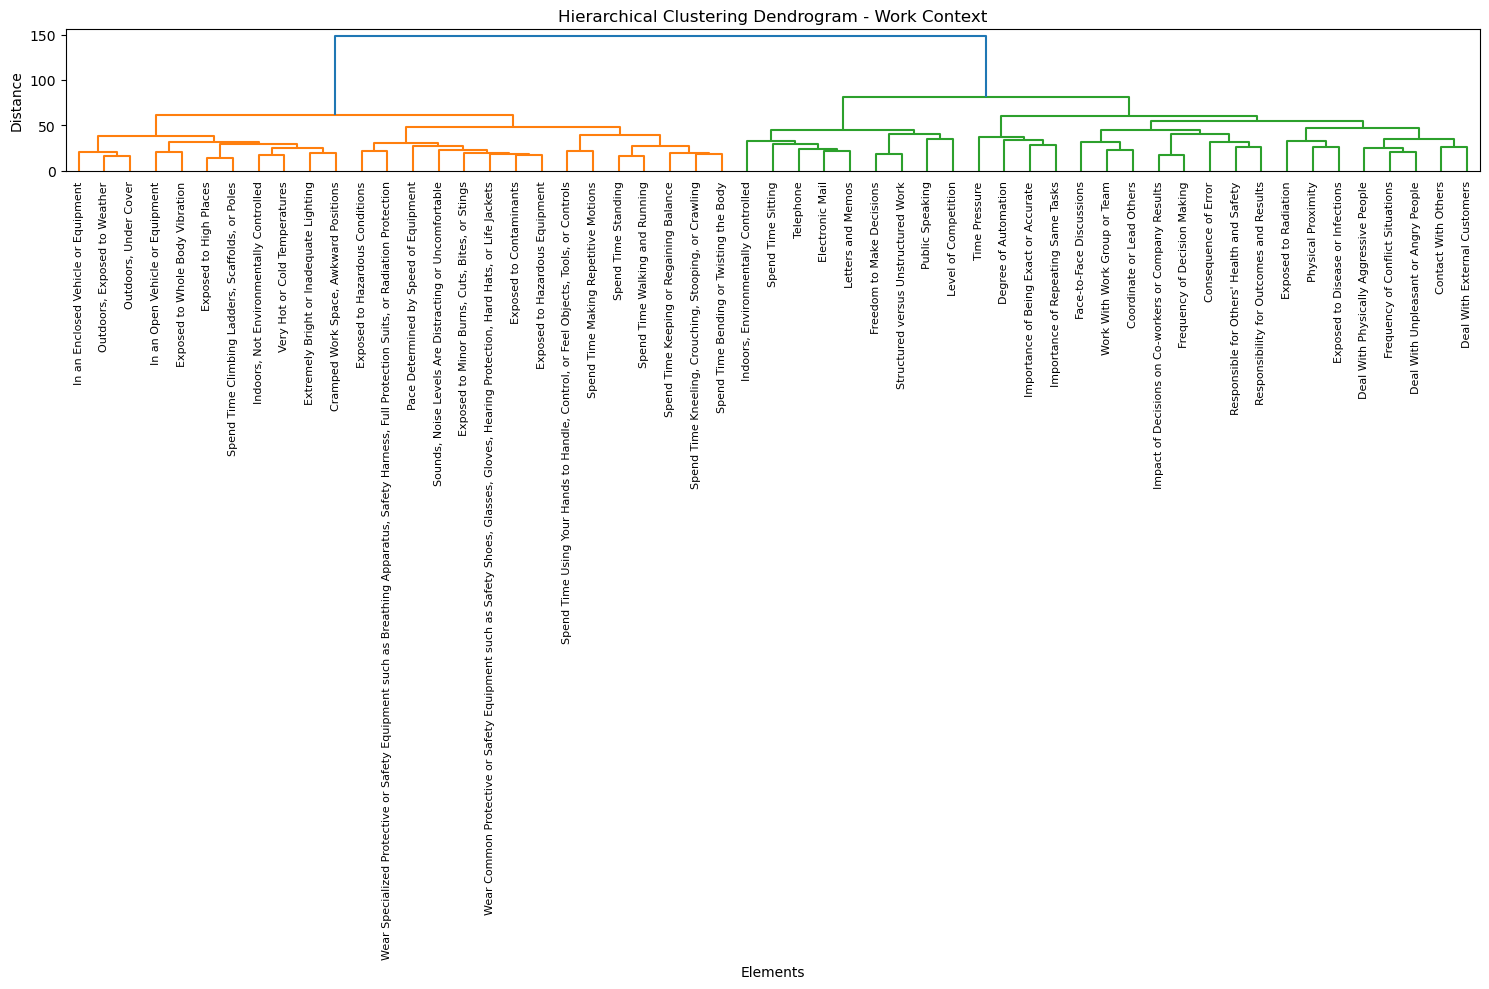

Number of elements clustered: 55
Height range of dendrogram: 13.38 to 148.40
Linkage Method:  complete


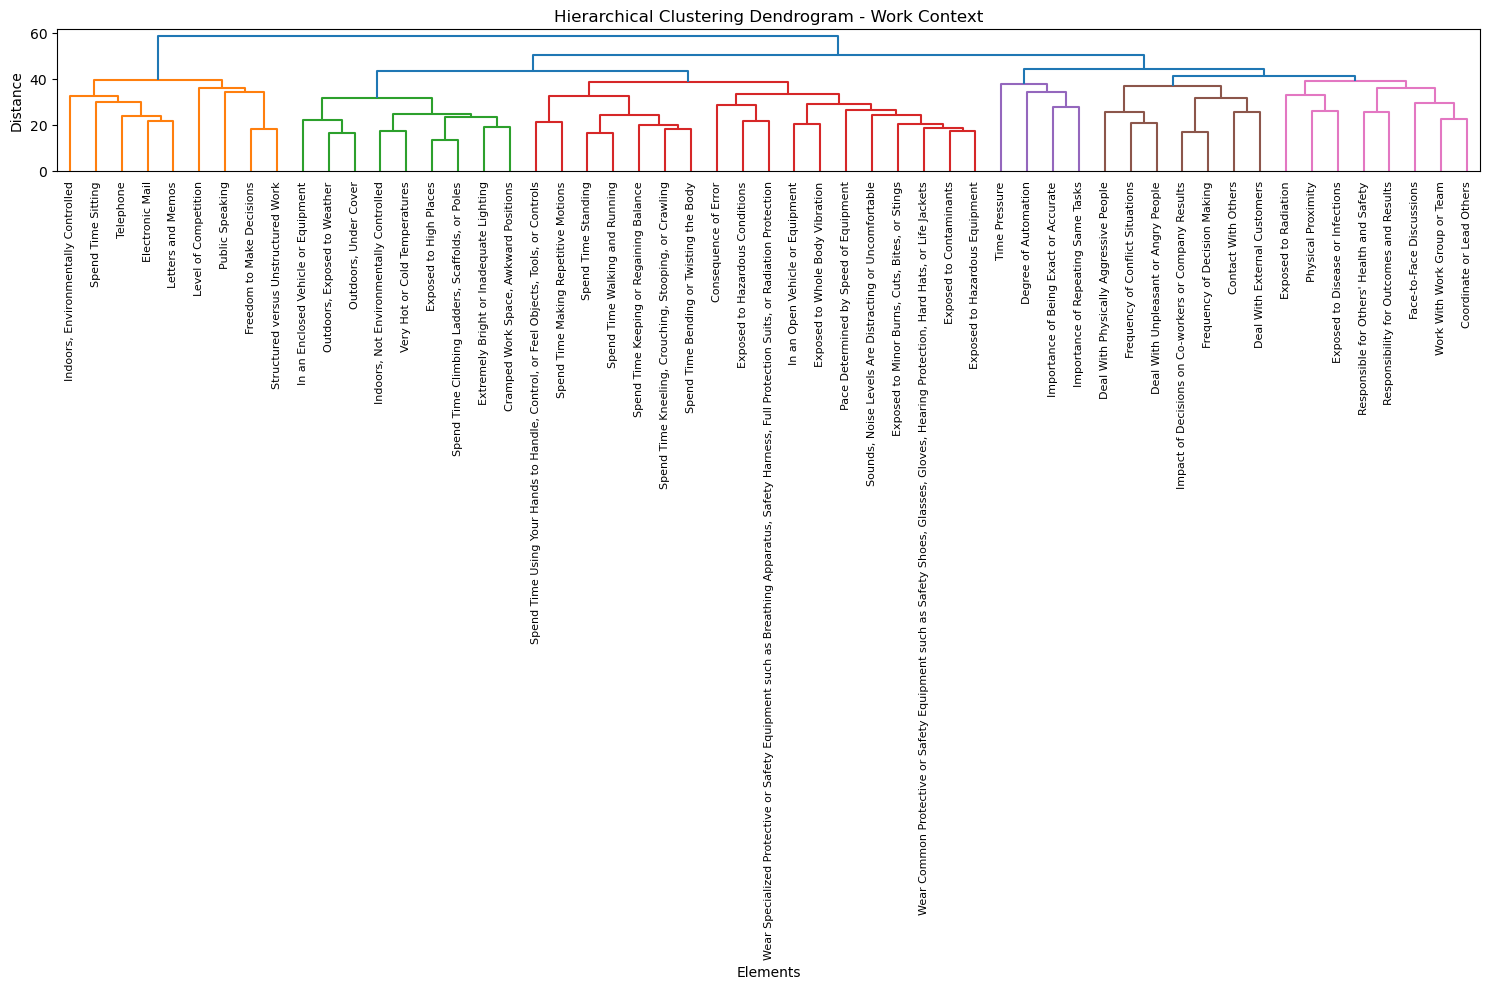

Number of elements clustered: 55
Height range of dendrogram: 13.38 to 58.60
Linkage Method:  single


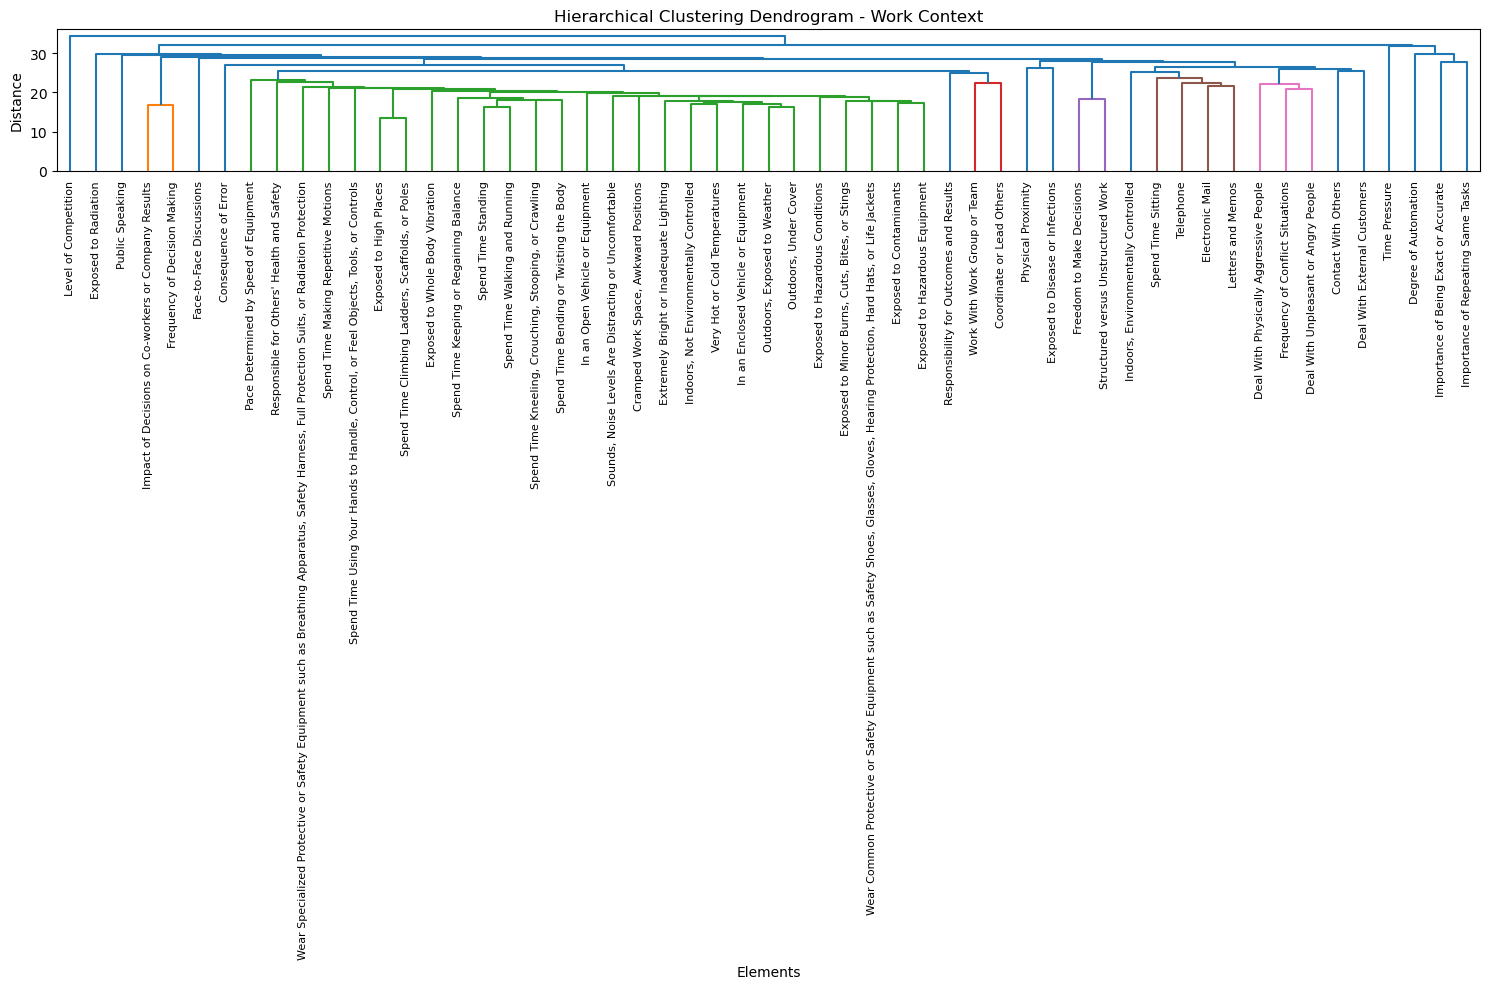

Number of elements clustered: 55
Height range of dendrogram: 13.38 to 34.45
Linkage Method:  average


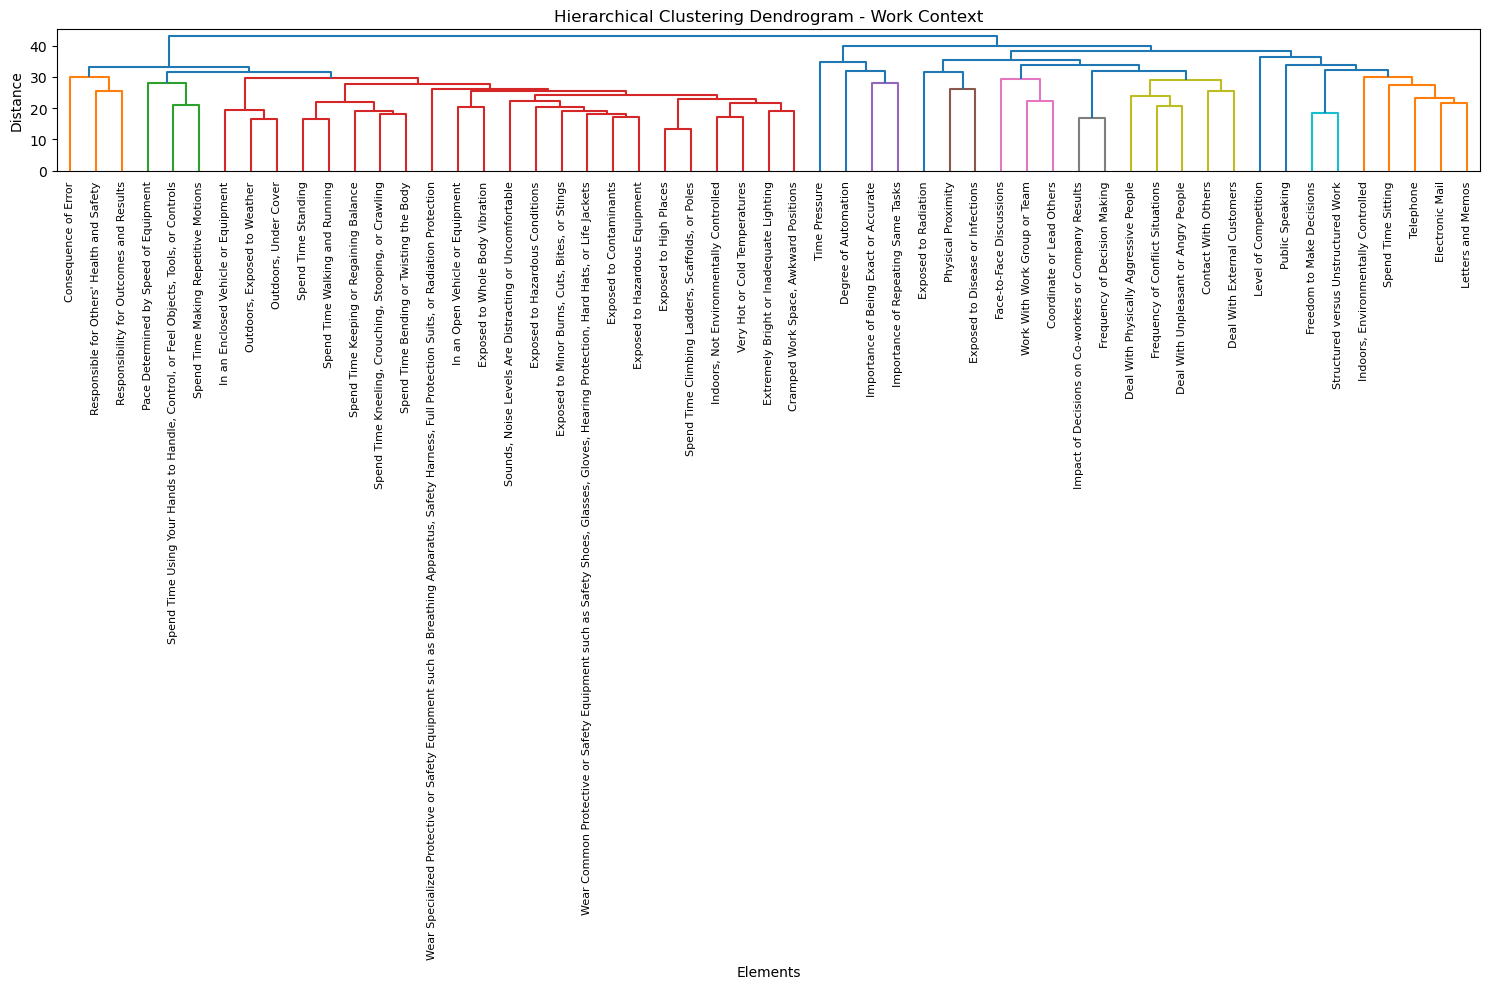

Number of elements clustered: 55
Height range of dendrogram: 13.38 to 43.04

Processing Work Activity:
Shape of Work Activity wide format: (873, 82)
Linkage Method:  ward


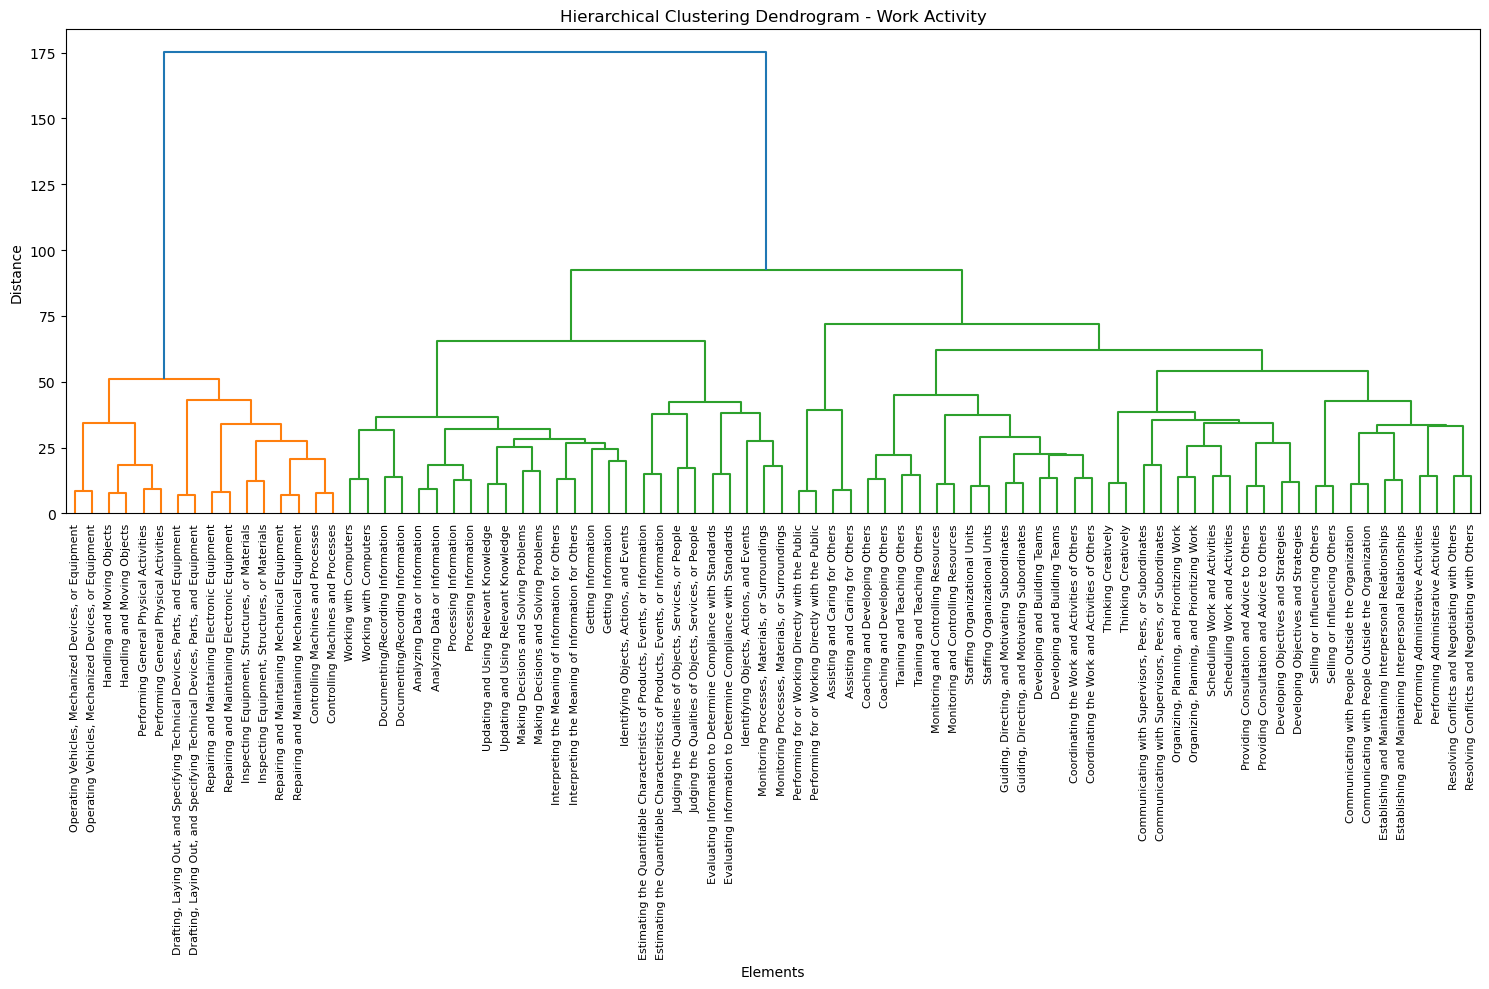

Number of elements clustered: 82
Height range of dendrogram: 6.78 to 175.06
Linkage Method:  complete


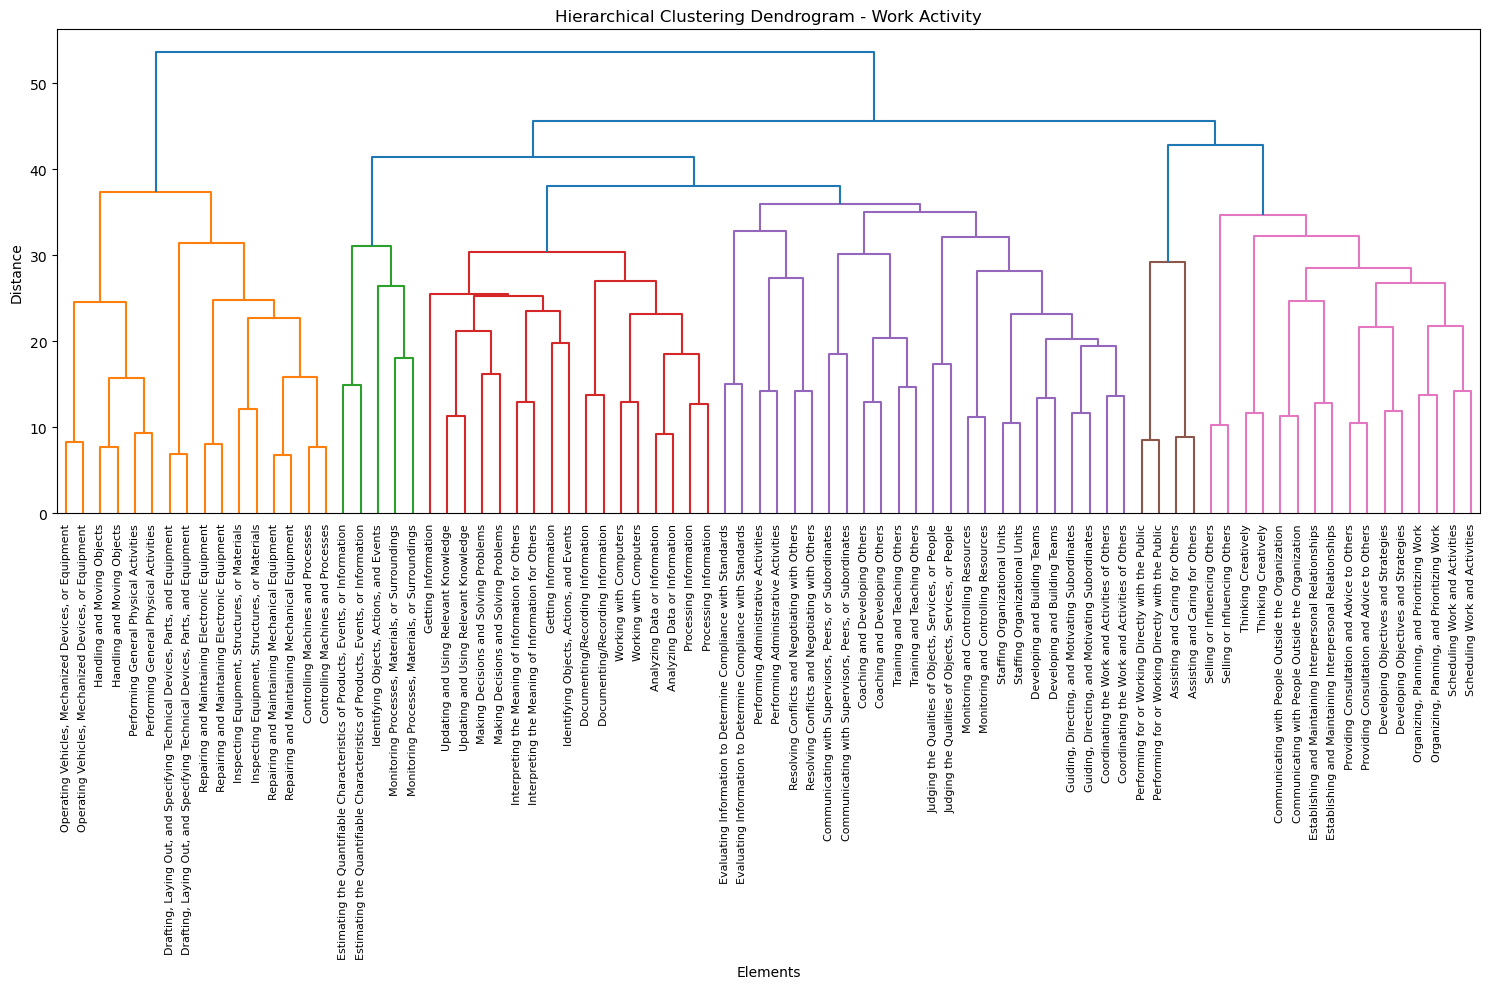

Number of elements clustered: 82
Height range of dendrogram: 6.78 to 53.58
Linkage Method:  single


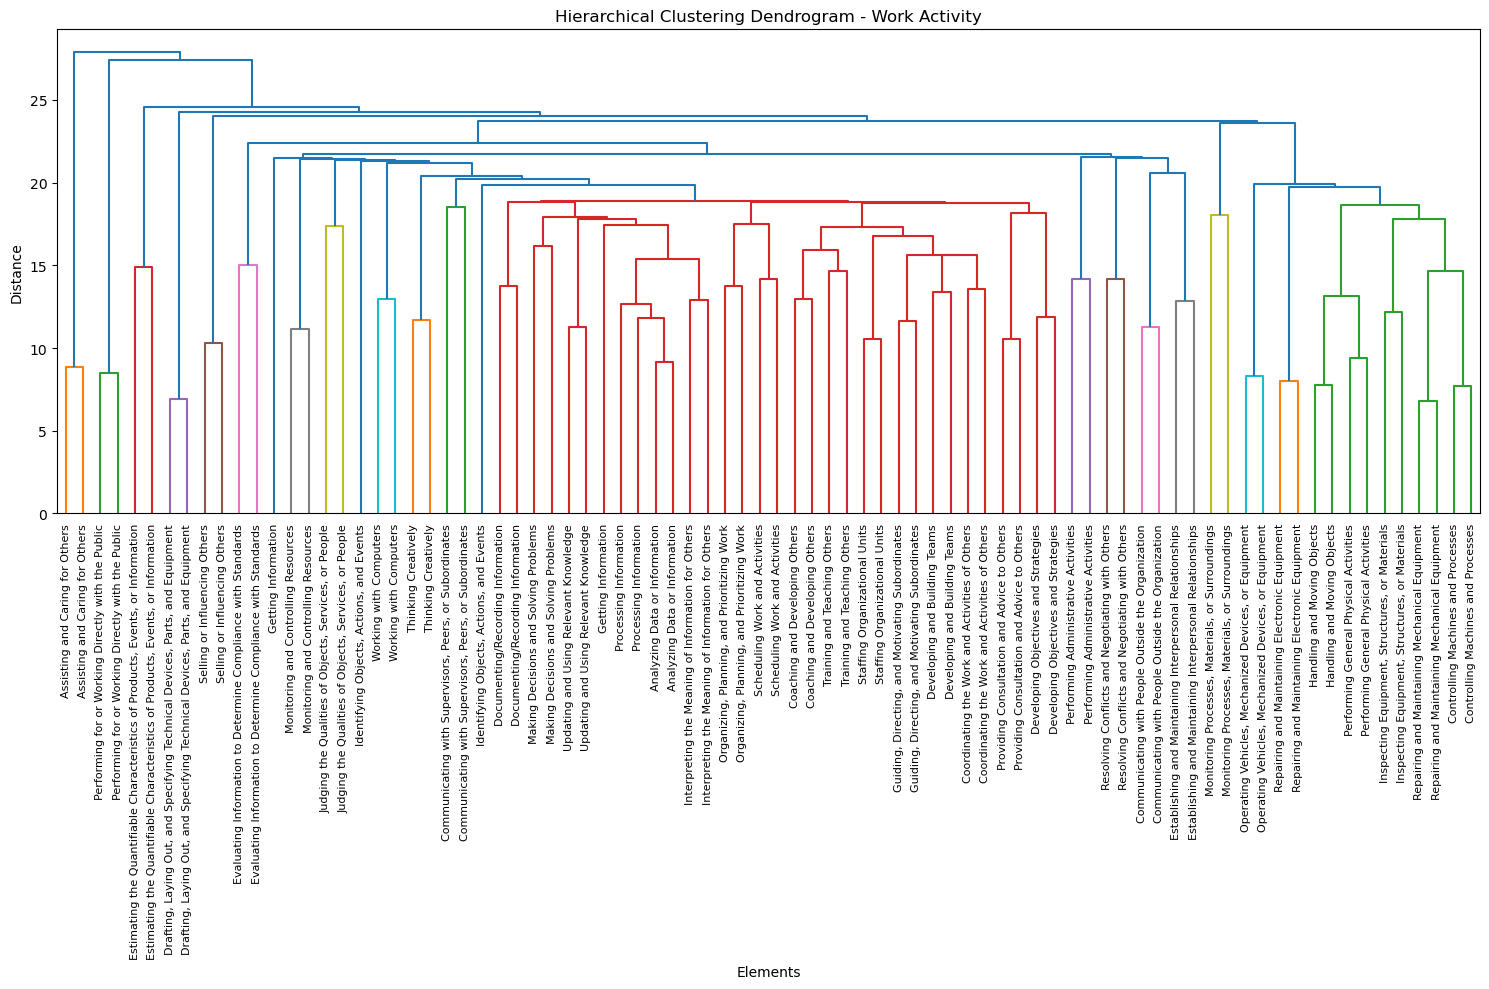

Number of elements clustered: 82
Height range of dendrogram: 6.78 to 27.88
Linkage Method:  average


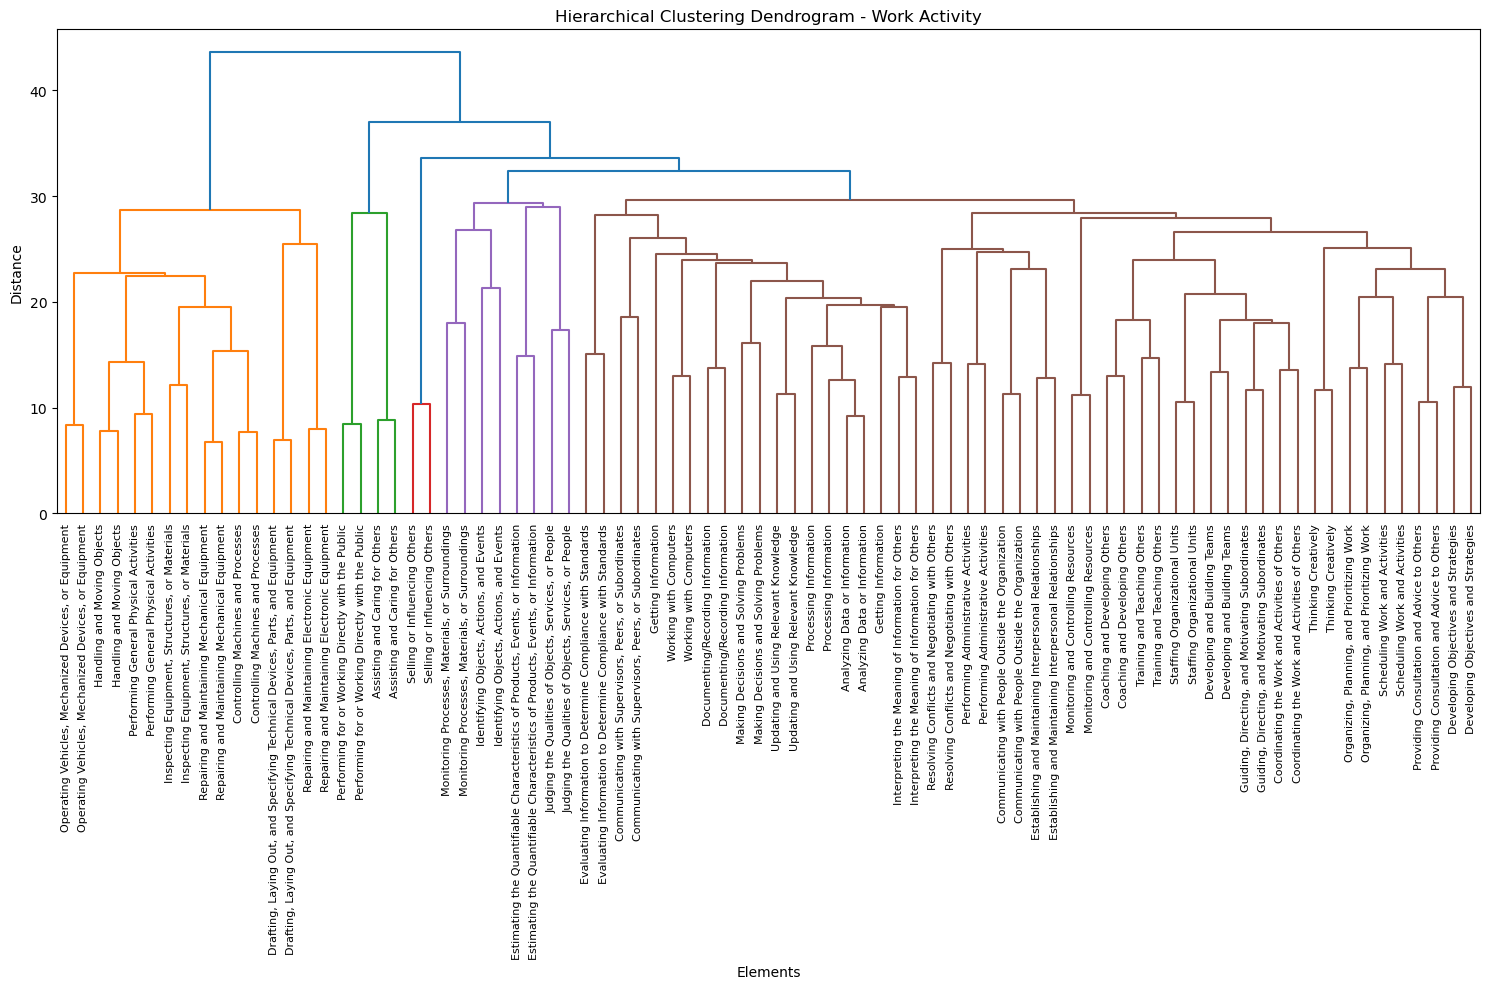

Number of elements clustered: 82
Height range of dendrogram: 6.78 to 43.60

Clustering Complete!
Summary of processed attributes:
Knowledge: 66 elements
Skill: 70 elements
Ability: 104 elements
Work Context: 55 elements
Work Activity: 82 elements


In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Configuration
plt.style.use('default')  # Use default style, or try 'classic' if you prefer
attributes_to_cluster = ['Knowledge', 'Skill', 'Ability', 'Work Context', 'Work Activity']

# Initialize storage
cluster_results = {}
wide_dfs = {}

# Filter attributes
df_attr = df[df['Attribute Type'].isin(attributes_to_cluster)]

# Create separate dataframes for each attribute
attr_dfs = {attr: df_attr[df_attr['Attribute Type'] == attr] 
            for attr in attributes_to_cluster}

# Process each attribute
for attr, attr_df in attr_dfs.items():
    print(f"\nProcessing {attr}:")
    
    try:
        # Create wide format
        wide_dfs[attr] = pd.pivot(attr_df,
                                 index='Title',
                                 columns=['Element Name', 'Scale Name'],
                                 values='Data Value')
        
        print(f"Shape of {attr} wide format: {wide_dfs[attr].shape}")
        
        # Handle missing values
        imputer = SimpleImputer(strategy='mean')
        df_filled = pd.DataFrame(
            imputer.fit_transform(wide_dfs[attr]),
            columns=wide_dfs[attr].columns,
            index=wide_dfs[attr].index
        )
        
        # Standardize
        scaler = StandardScaler()
        df_scaled = pd.DataFrame(
            scaler.fit_transform(df_filled),
            columns=df_filled.columns,
            index=df_filled.index
        )
        
        # Compute linkage matrix
        linkage_methods = ['ward', 'complete', 'single', 'average']
        for method in linkage_methods:
            linkage_matrix = linkage(df_scaled.T, method=method)
            print("Linkage Method: ", method)
        
            # Store results with additional information
            cluster_results[attr] = {
                'linkage_matrix': linkage_matrix,
                'scaled_data': df_scaled,
                'column_names': wide_dfs[attr].columns,
                'n_elements': df_scaled.shape[1],
                'original_df': wide_dfs[attr],
                'element_names': [col[0] for col in wide_dfs[attr].columns]  # Get unique element names
            }
            
            # Visualize dendrogram with improved readability
            plt.figure(figsize=(15, 10))
            
            # Calculate optimal leaf font size based on number of elements
            leaf_font_size = max(8, min(12, 200 / df_scaled.shape[1]))
            
            dendrogram(
                linkage_matrix,
                leaf_rotation=90,  # Rotate labels
                leaf_font_size=leaf_font_size,  # Adjust font size
                labels=cluster_results[attr]['element_names']  # Use element names
            )
            
            plt.title(f'Hierarchical Clustering Dendrogram - {attr}')
            plt.xlabel('Elements')
            plt.ylabel('Distance')
            plt.tight_layout()  # Adjust layout to prevent label cutoff
            plt.show()
            
            # Print summary statistics
            print(f"Number of elements clustered: {cluster_results[attr]['n_elements']}")
            print(f"Height range of dendrogram: {linkage_matrix[:, 2].min():.2f} to {linkage_matrix[:, 2].max():.2f}")
            
    except Exception as e:
        print(f"Error processing {attr}: {str(e)}")
        continue

# Print final summary
print("\nClustering Complete!")
print("Summary of processed attributes:")
for attr in cluster_results:
    print(f"{attr}: {cluster_results[attr]['n_elements']} elements")